In [3]:
require(plotly)
require(ggplot2)
require(gridExtra)

In [44]:
options(repr.matrix.max.rows = 1000)
options(repr.matrix.max.cols = 30)
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=16, repr.plot.height=8)

In [45]:
seriesFolder = 'data'
modelFolder  = 'model'
resultFolder = 'testResult'
imagesFolder = 'images'

Leitura Resultados
===

In [58]:
modelsLake = list.files(path = modelFolder, pattern = NULL, all.files = FALSE, full.names = TRUE, recursive = FALSE)

In [59]:
modelsName = c("fourier_" 
               ,"wavelet_" 
               ,"ssa_"
               ,"emdrp_"
               #,"emdmi_" 
               ,"forcedec_" 
               #,"forcedectopo_" 
               #,"forcedectimedomain_"
              )
listResult = list()
for(i in 1:length(modelsName)){
    models = modelsLake[grepl(modelsName[i], modelsLake)]
    testData = data.frame()
    for(j in 1:length(models)){
        load(models[j])
        testData = rbind(testData, model$eval)
    }
    listResult[[i]] = testData
}

In [60]:
#idx = matrix(1:55, ncol=11, byrow=T)
#rFake = rbind((listResult[[5]])[1,],
#              (listResult[[7]])[1:32,],
#              (listResult[[5]])[34:55,]
#             )
#rFake$tech = 'Fake'
#listResult[[8]] = rFake

Métrica: MDDL
===

pdf 
  2

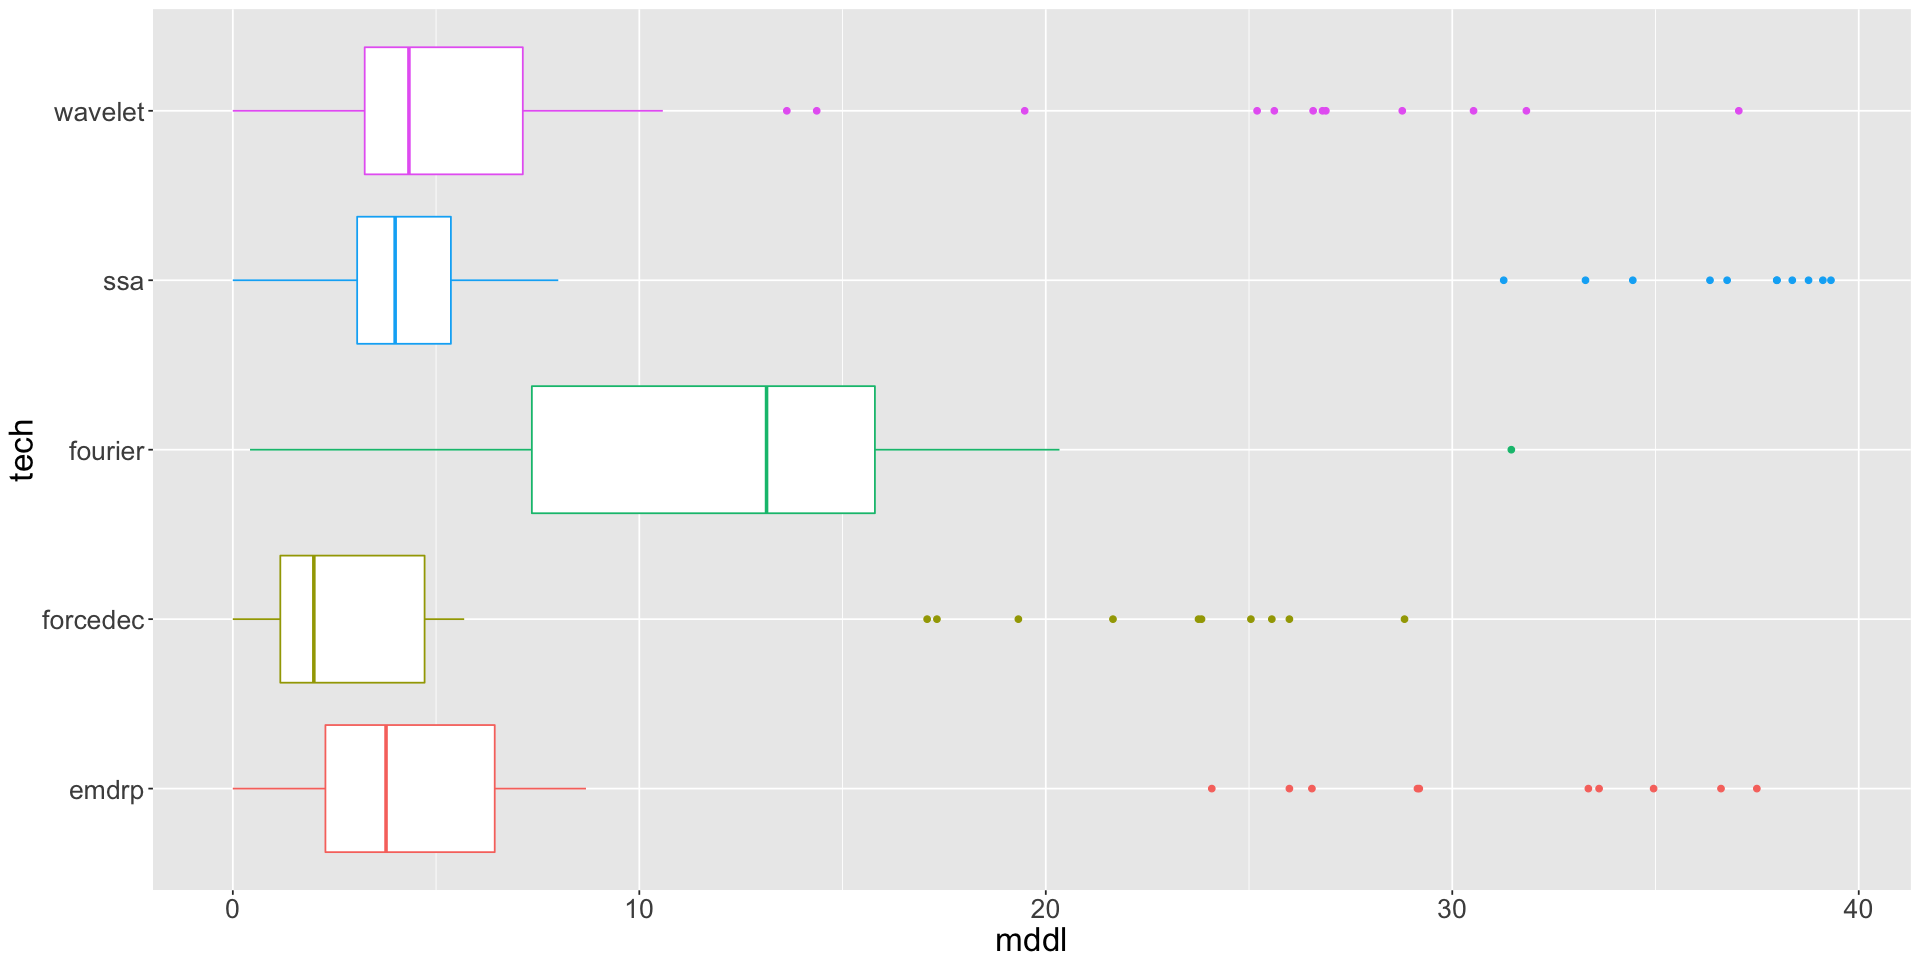

In [62]:
options(repr.plot.width=16, repr.plot.height=8) 
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl')])
p = ggplot(data, aes(tech, mddl, color = tech)) +
    geom_boxplot() +
    coord_flip() +
    theme(text = element_text(size=20), legend.position="none")
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"result_mddl_boxplot.pdf", sep='/'), width=16, height=5)

In [63]:
n = 'mddl'
m = matrix(unlist(lapply(listResult,function(x){
    cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))
})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,11.7077207126322,6.14722573455826
wavelet,8.58930771309564,9.68924838267543
ssa,10.2825670158012,13.4379932963978
emdrp,8.41806347935233,11.1446554132369
forcedec,5.79139969223668,8.38225615840681


Métrica: MDA
===

pdf 
  2

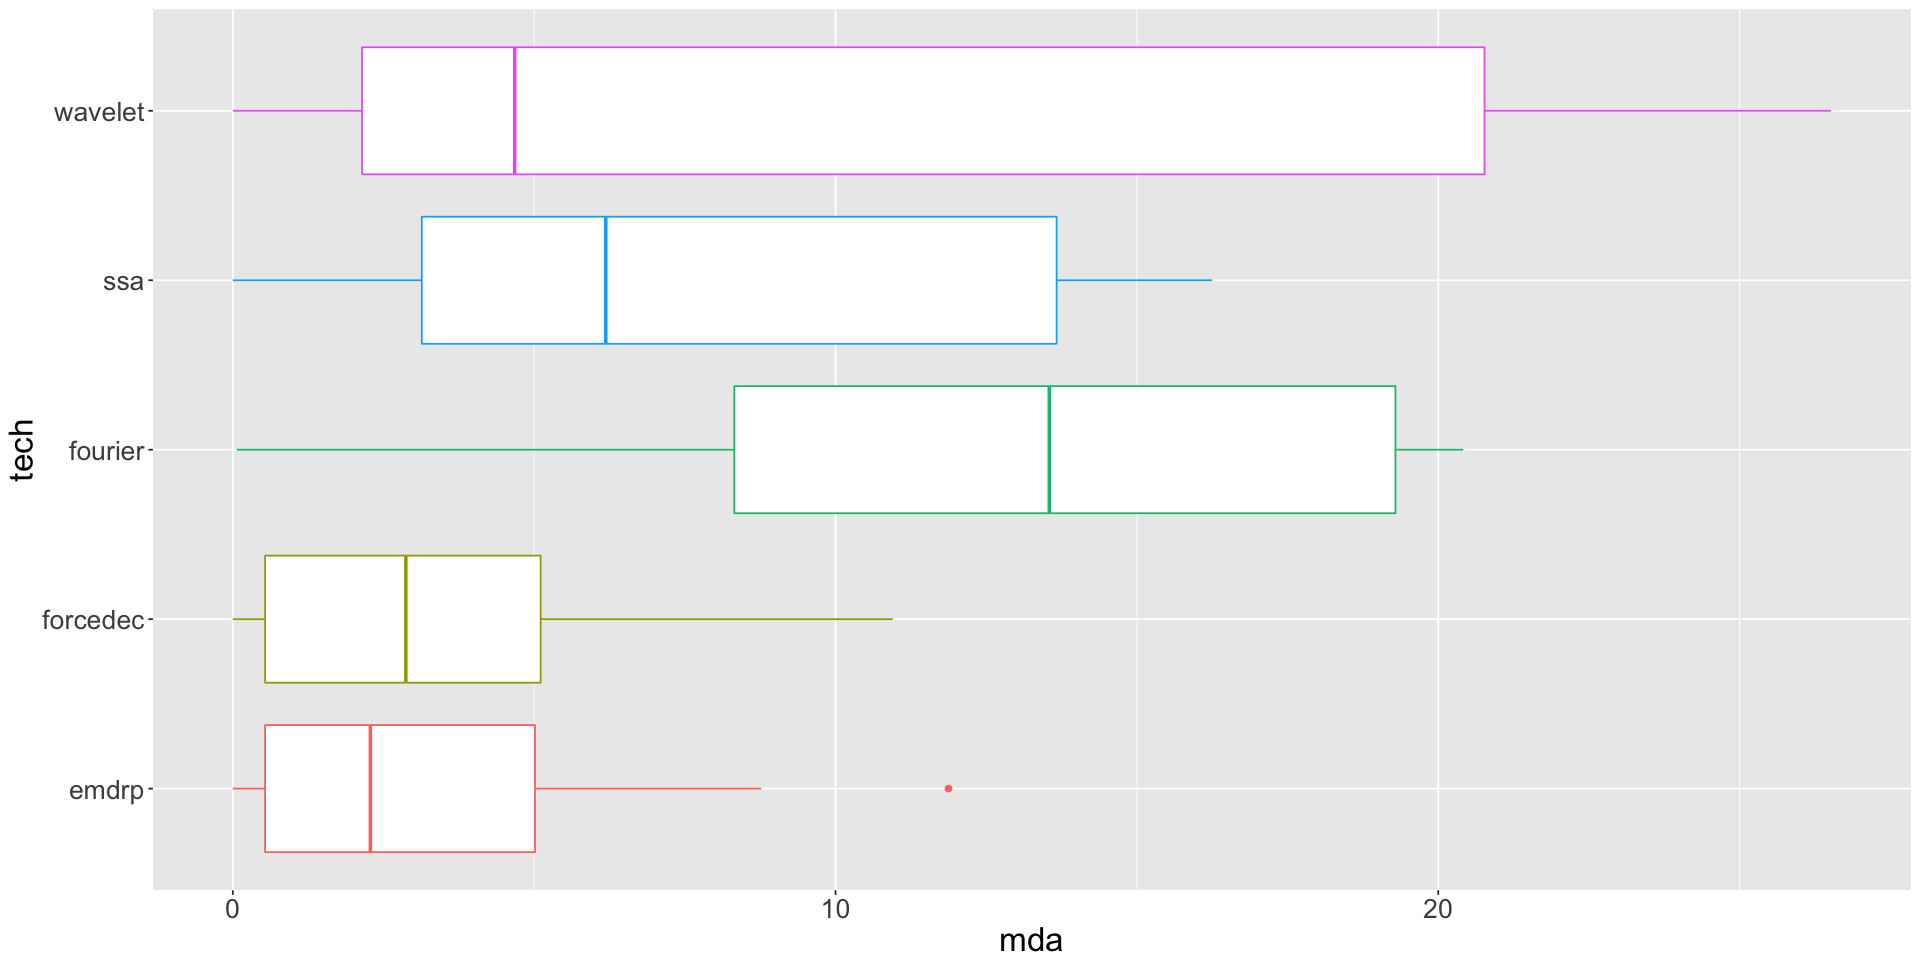

In [64]:
options(repr.plot.width=16, repr.plot.height=8)    
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mda')])
p = ggplot(data, aes(tech, mda, color = tech)) + 
    geom_boxplot() +
    coord_flip() +
    theme(text = element_text(size=20), legend.position="none")
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"result_mda_boxplot.pdf", sep='/'), width=16, height=5)

In [65]:
n = 'mda'
m = matrix(unlist(lapply(listResult,function(x){cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,13.1420430837582,6.81700248610247
wavelet,11.0495331959186,10.3972655193003
ssa,7.75171400464606,5.60510807020618
emdrp,3.03886687623324,2.82752379542341
forcedec,3.20140888554869,2.72911643767721


Métrica: Dist
===

In [66]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

pdf 
  2

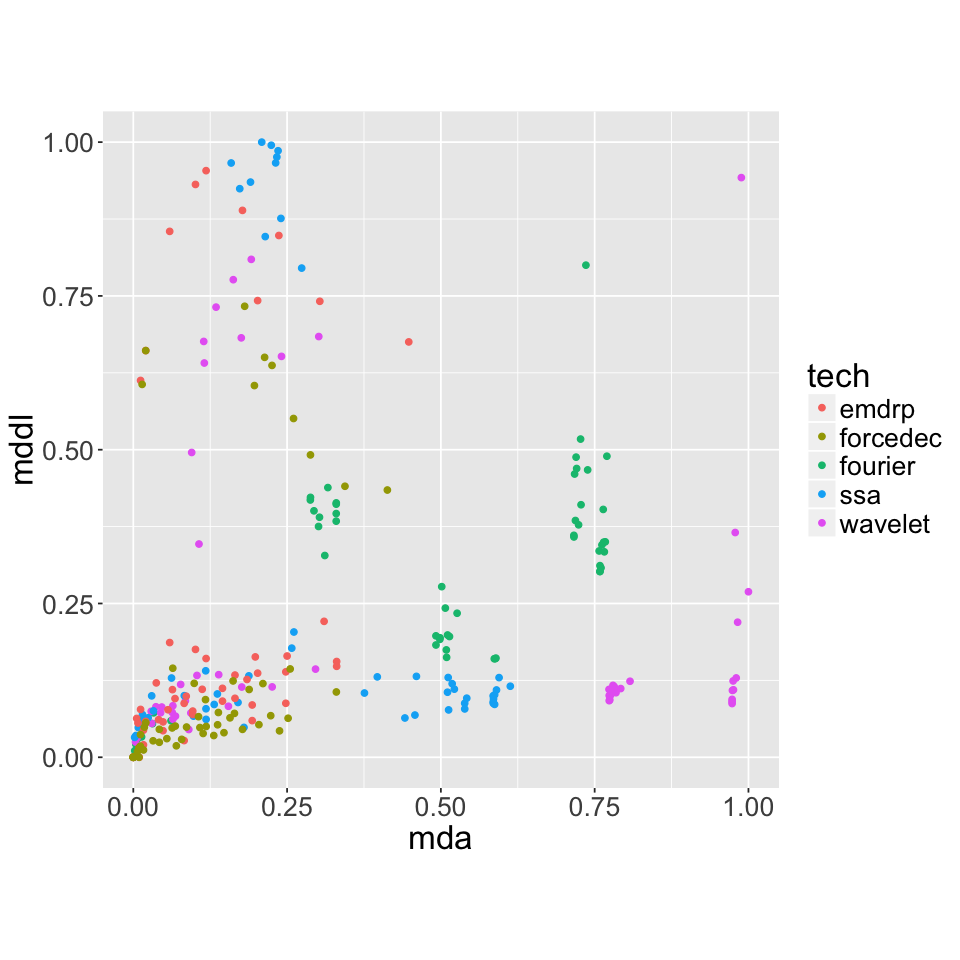

In [67]:
p = ggplot(data, aes(x = mda, y = mddl, color = tech)) + 
    geom_point() + 
    theme(text = element_text(size=20)) + 
    coord_fixed()
plot(p)    
dev.copy2pdf(file = paste(imagesFolder,"result_dist_scatterplot.pdf", sep='/'), width=16, height=5)

Warning message:
“Removed 142 rows containing missing values (geom_point).”

pdf 
  2

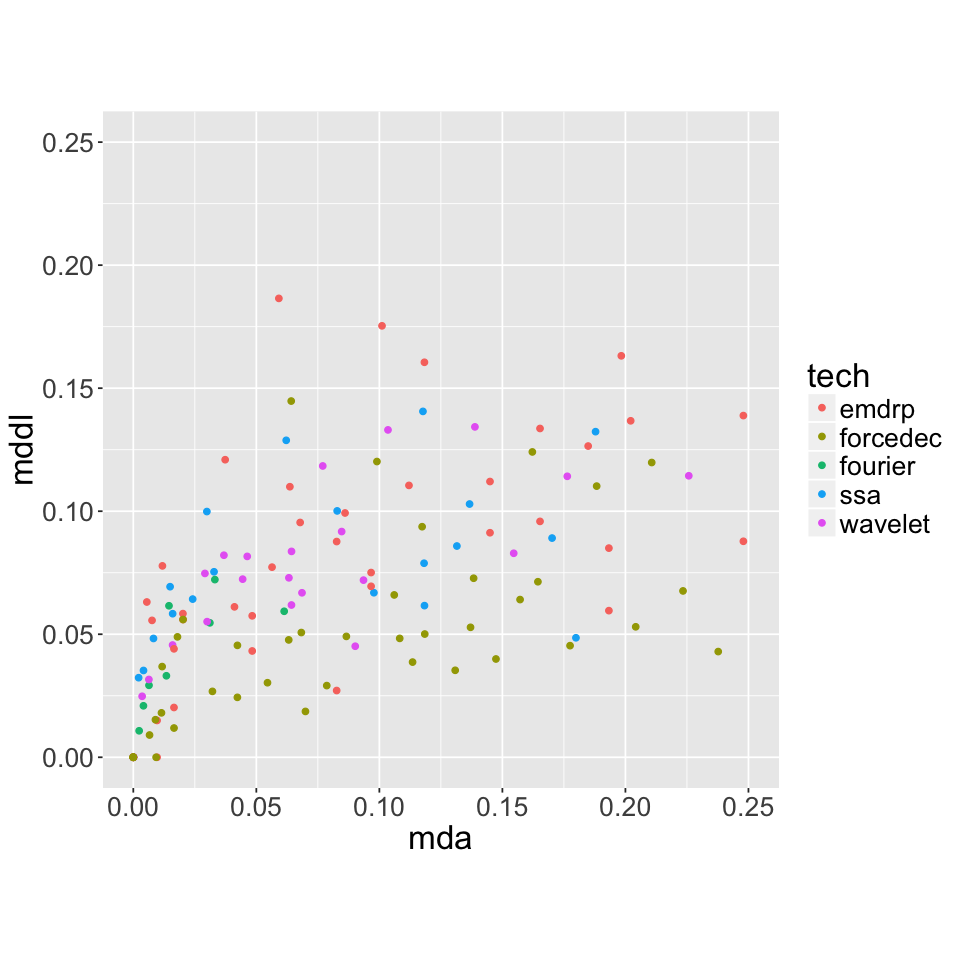

In [68]:
p = ggplot(data, aes(x = mda, y = mddl, color = tech)) + geom_point() + theme(text = element_text(size=20)) + coord_fixed() + xlim(0, 0.25) + ylim(0, 0.25)
plot(p)    
dev.copy2pdf(file = paste(imagesFolder,"result_dist_zoom_scatterplot.pdf", sep='/'), width=16, height=5)

pdf 
  2

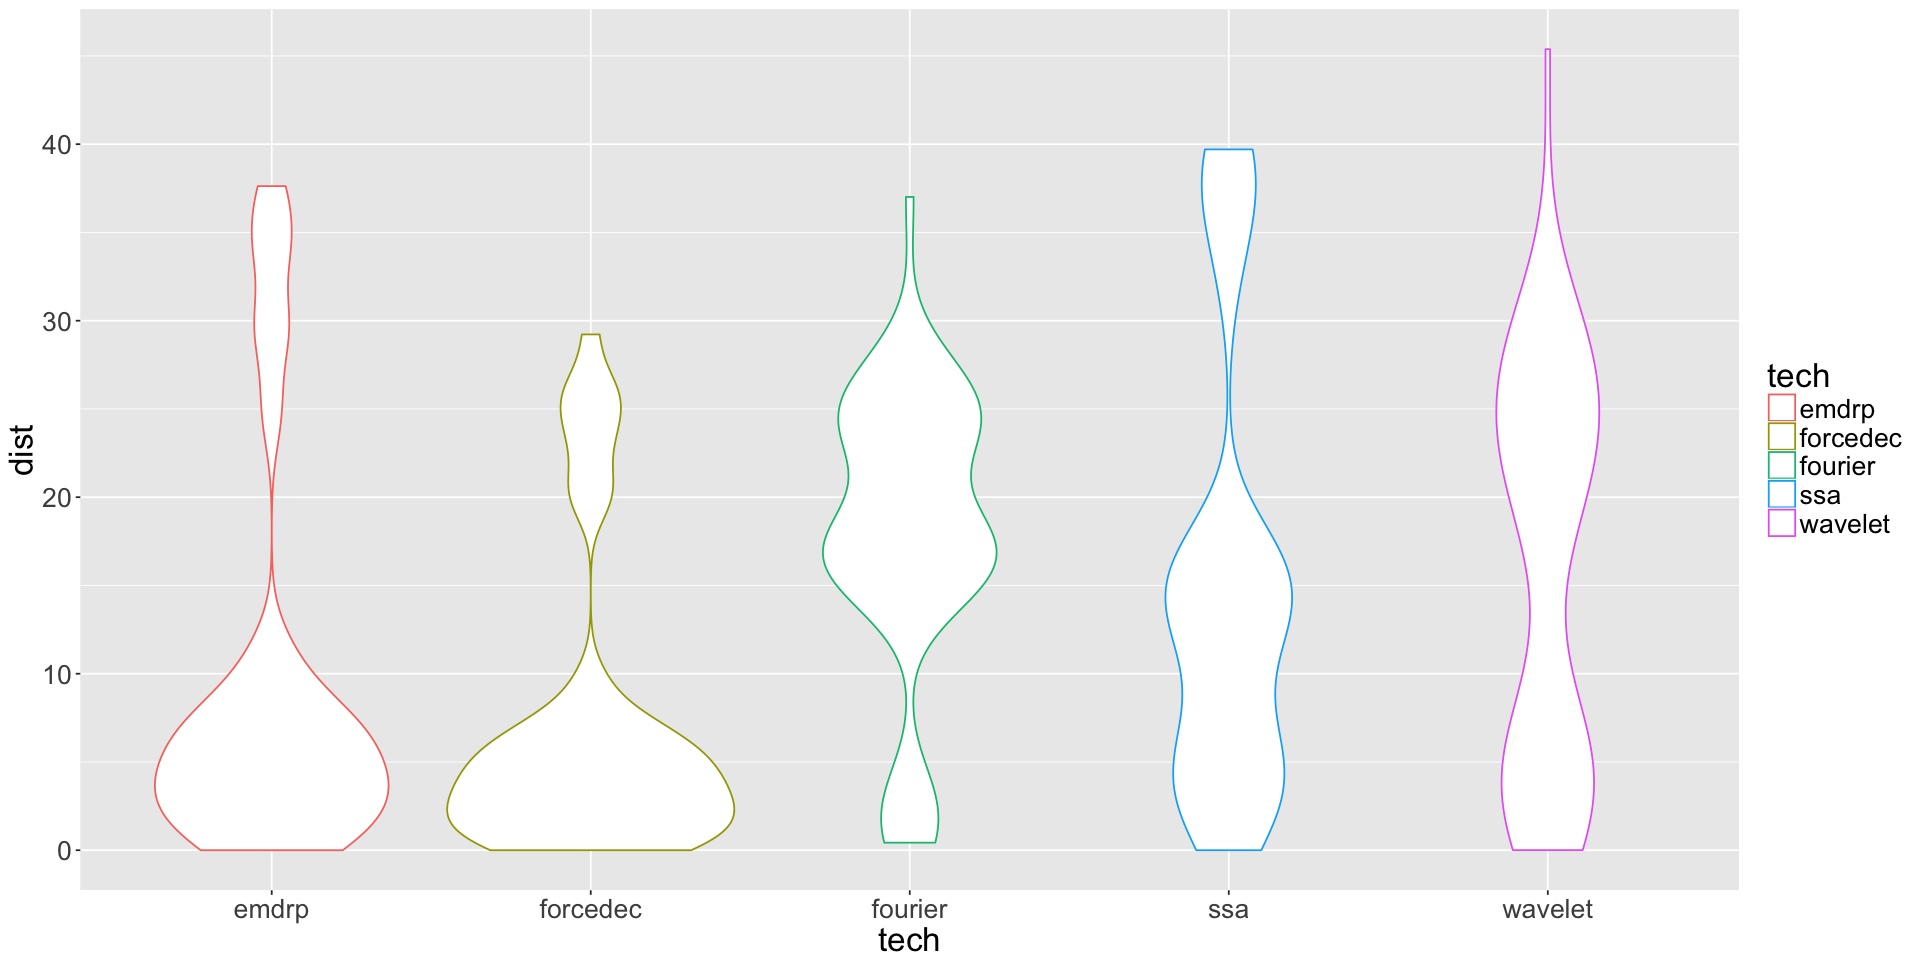

In [69]:
options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"result_dist_violin.pdf", sep='/'), width=16, height=5)

pdf 
  2

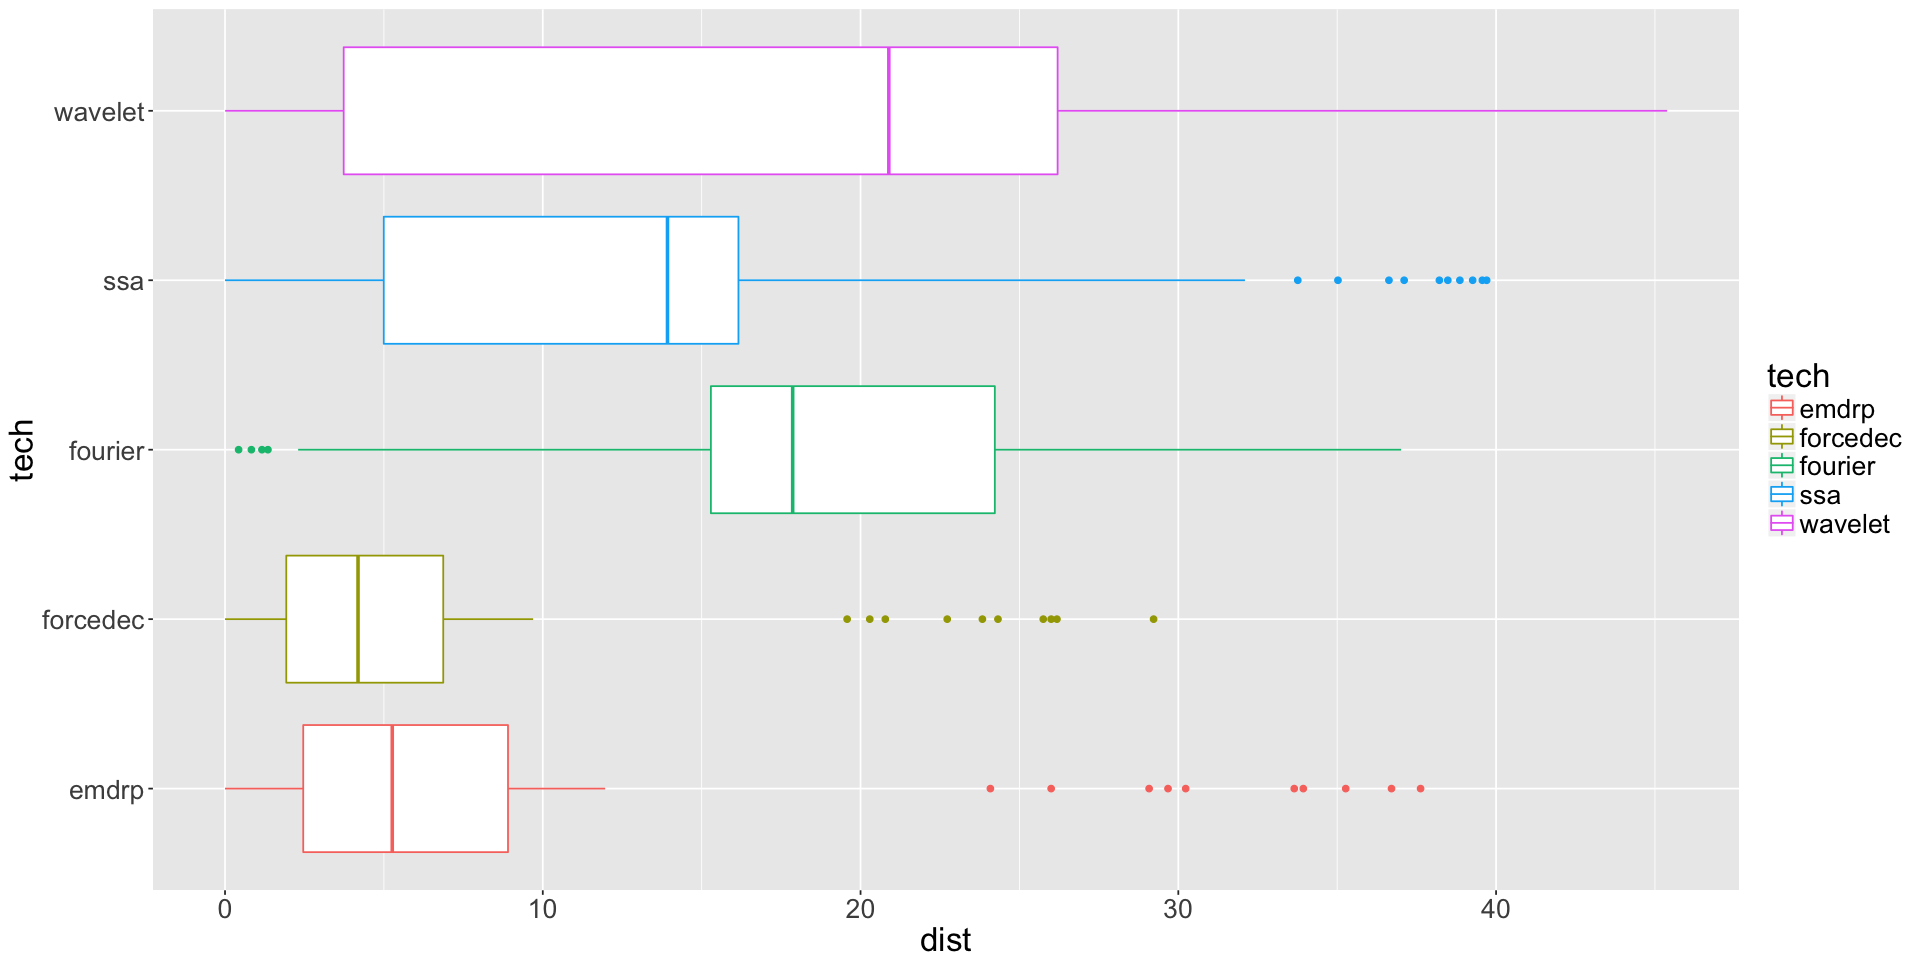

In [70]:
options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"result_dist_boxplot.pdf", sep='/'), width=16, height=5)

In [71]:
m = merge(aggregate(dist ~ tech, data, mean), aggregate(dist ~ tech, data, sd), by='tech')
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
emdrp,9.441805,11.089702
forcedec,7.159438,8.372799
fourier,18.070743,8.196442
ssa,15.025858,12.285376
wavelet,16.293460,11.449331


In [43]:
forcedec.idx = which(data$tech == 'forcedec')
emdrp.idx    = which(data$tech == 'ssa')
#forcedec = data[]
t.test(data$dist[forcedec.idx], data$dist[emdrp.idx])


	Welch Two Sample t-test

data:  data$dist[forcedec.idx] and data$dist[emdrp.idx]
t = -3.924, df = 95.262, p-value = 0.0001644
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.846102  -3.886737
sample estimates:
mean of x mean of y 
 7.159438 15.025858 


---
Dataset Seno
===

In [15]:
scenario.idx = 1:11

pdf 
  2

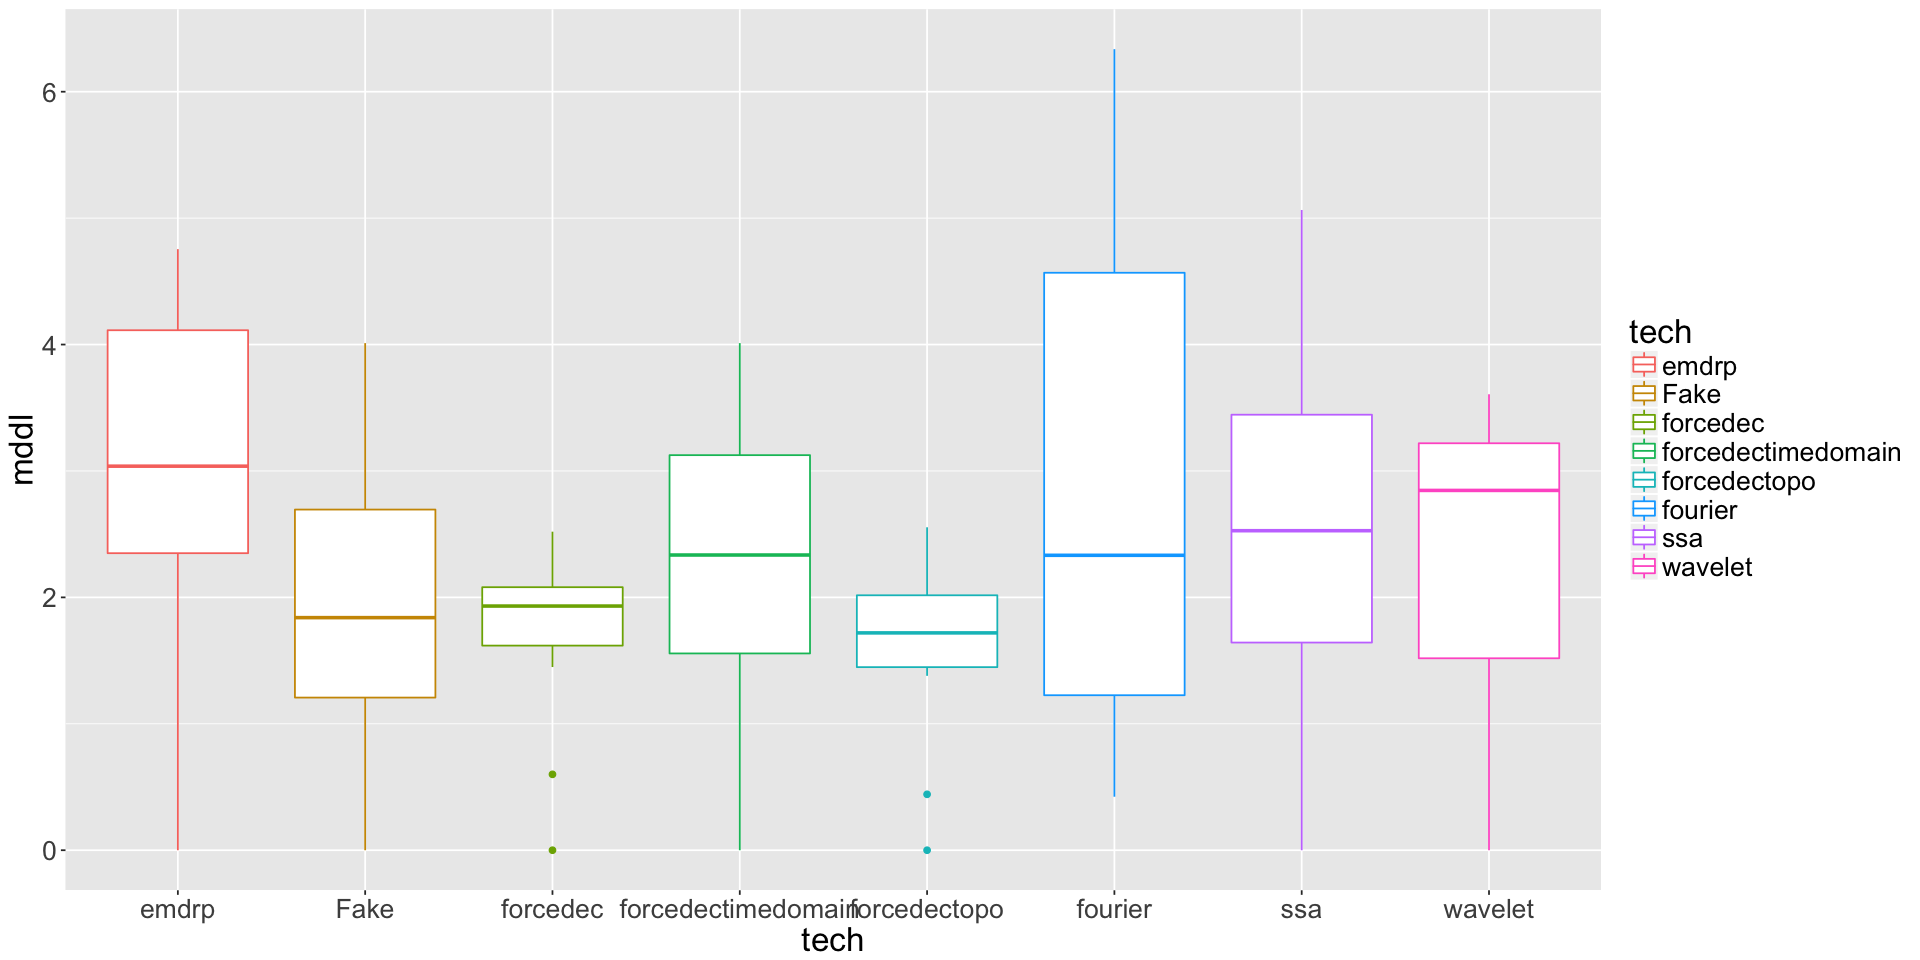

In [23]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mddl')])
ggplot(data, aes(tech, mddl, color = tech)) + geom_boxplot() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"seno_result_mddl.pdf", sep='/'), width=16, height=5)

In [ ]:

t.test(forcedec, emdrp)

pdf 
  2

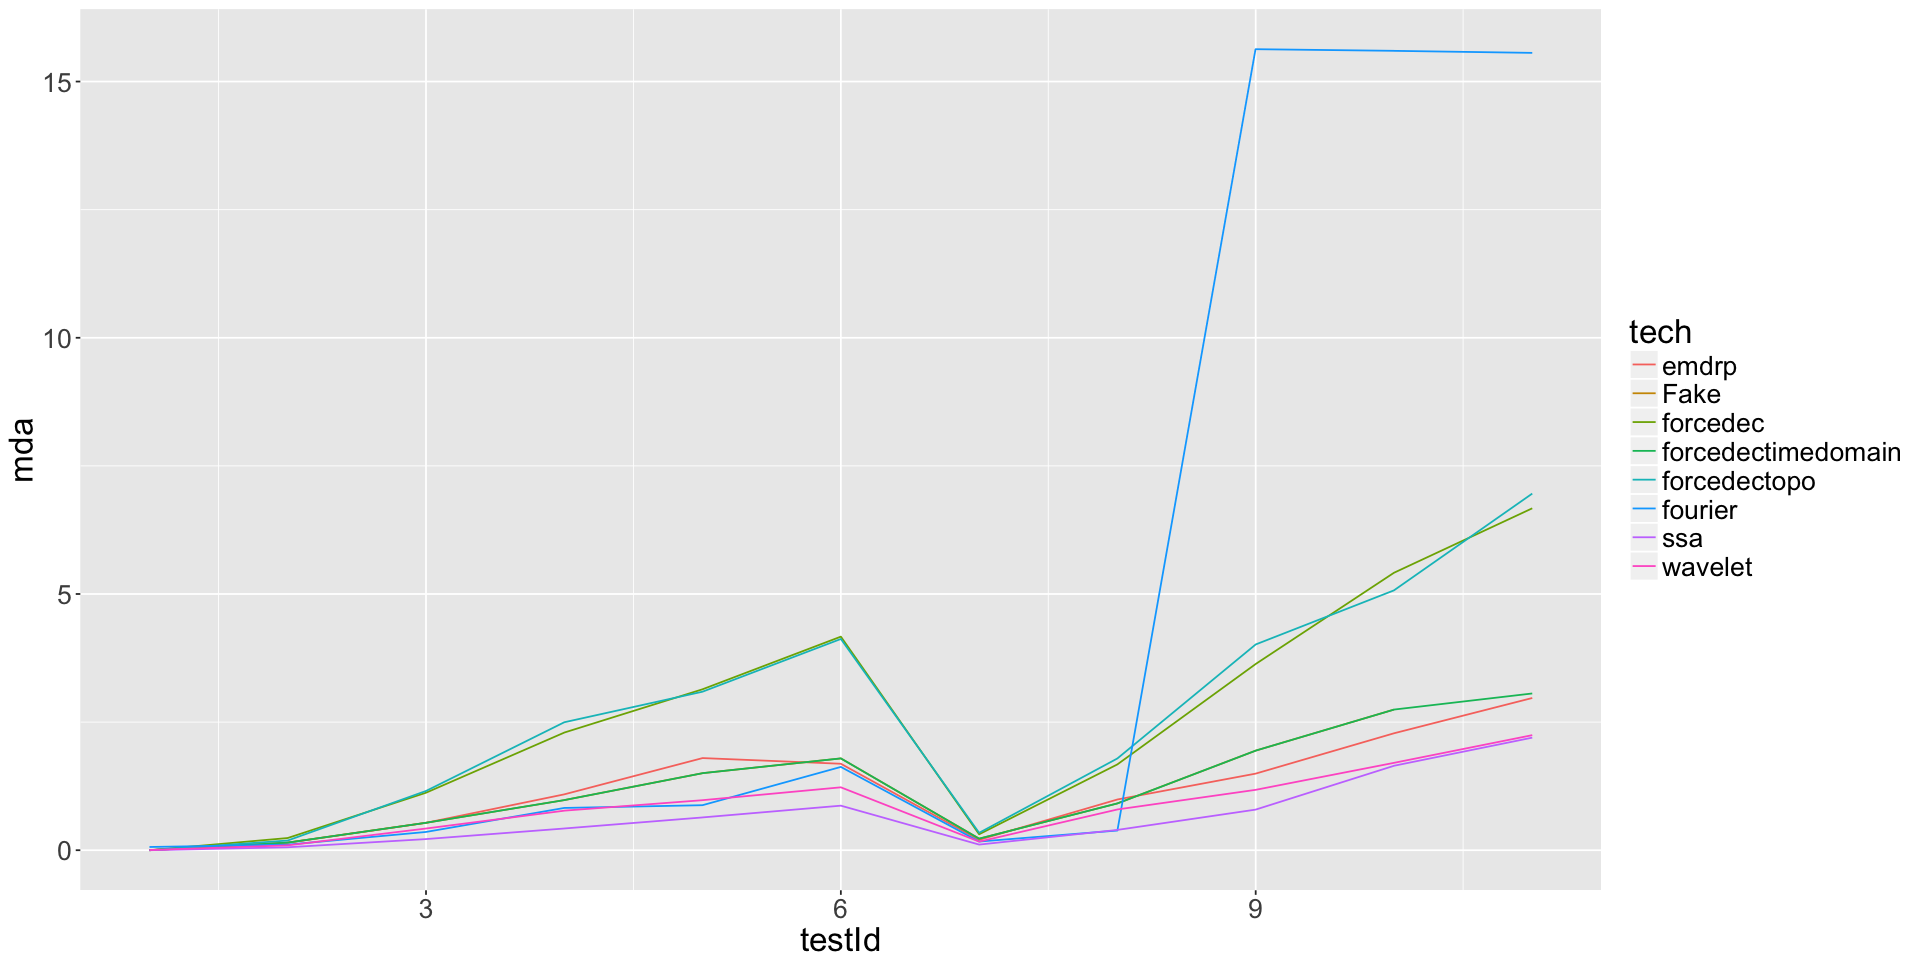

In [208]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"seno_result_mda.pdf", sep='/'), width=16, height=5)

In [209]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx, c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

pdf 
  2

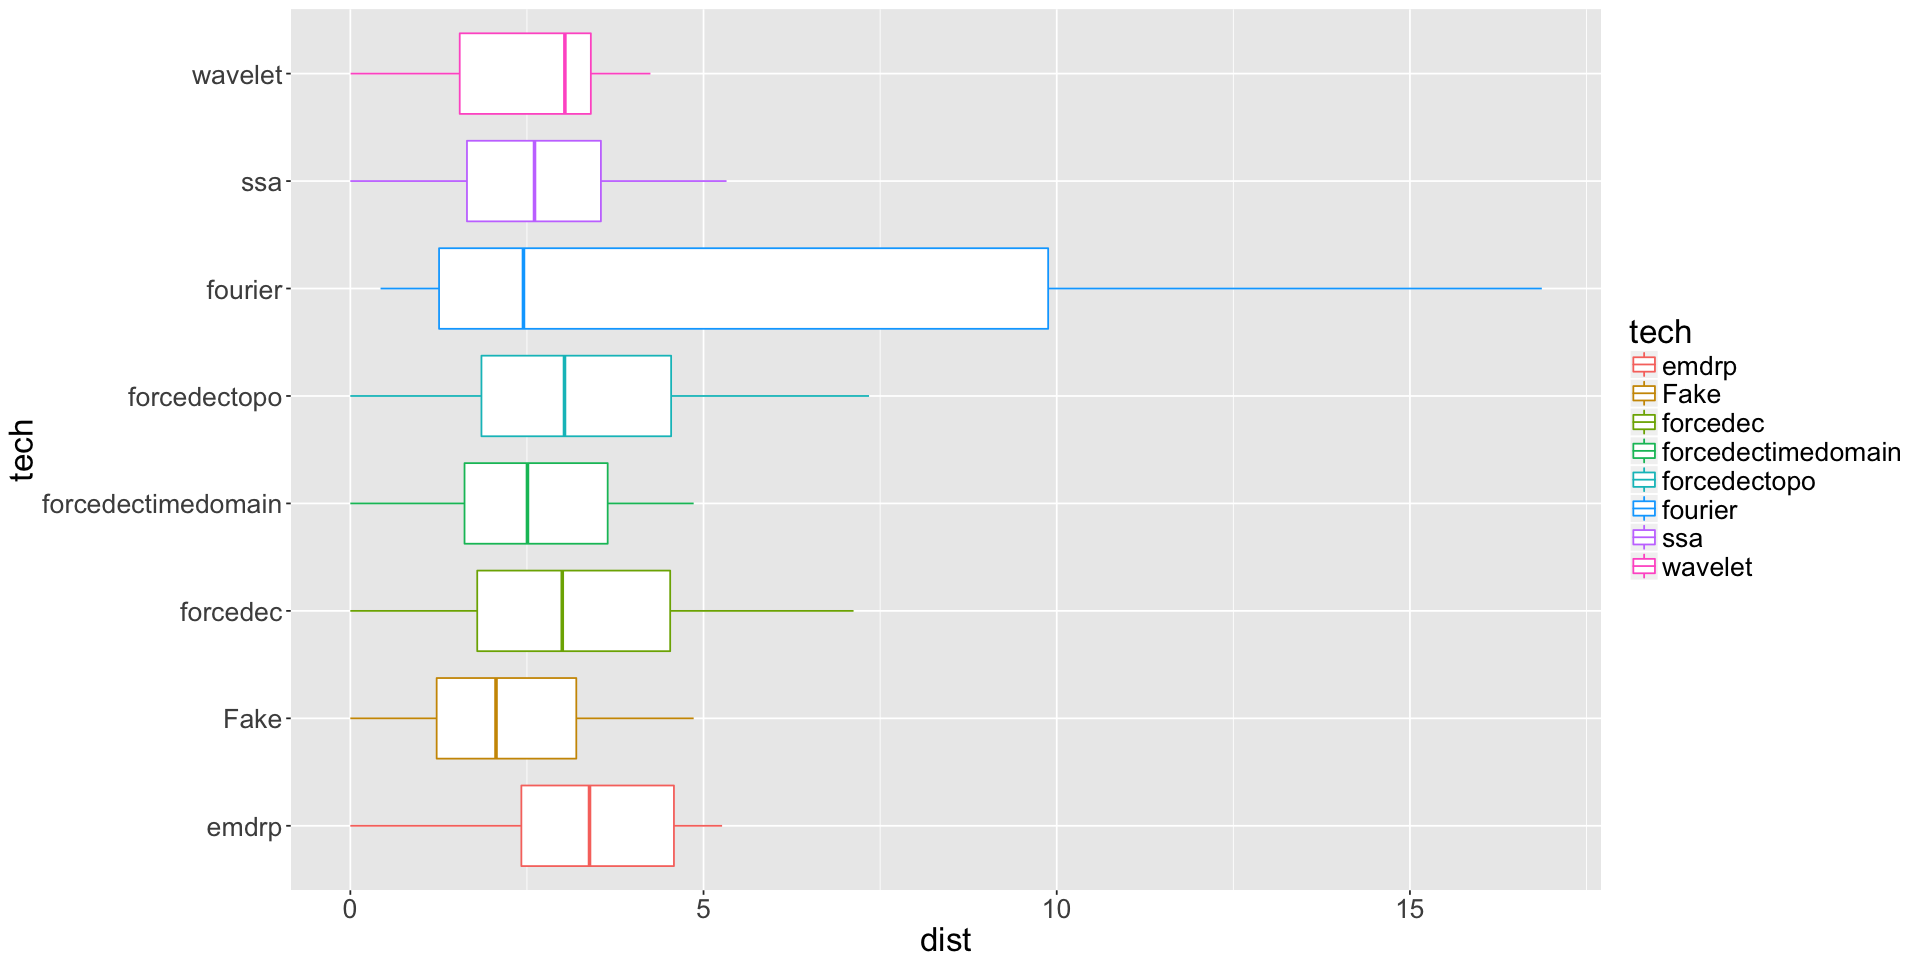

In [210]:
options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"seno_result_dist_boxplot.pdf", sep='/'), width=16, height=5)

---
Dataset Lorenz
===

In [211]:
scenario.idx = 12:22

pdf 
  2

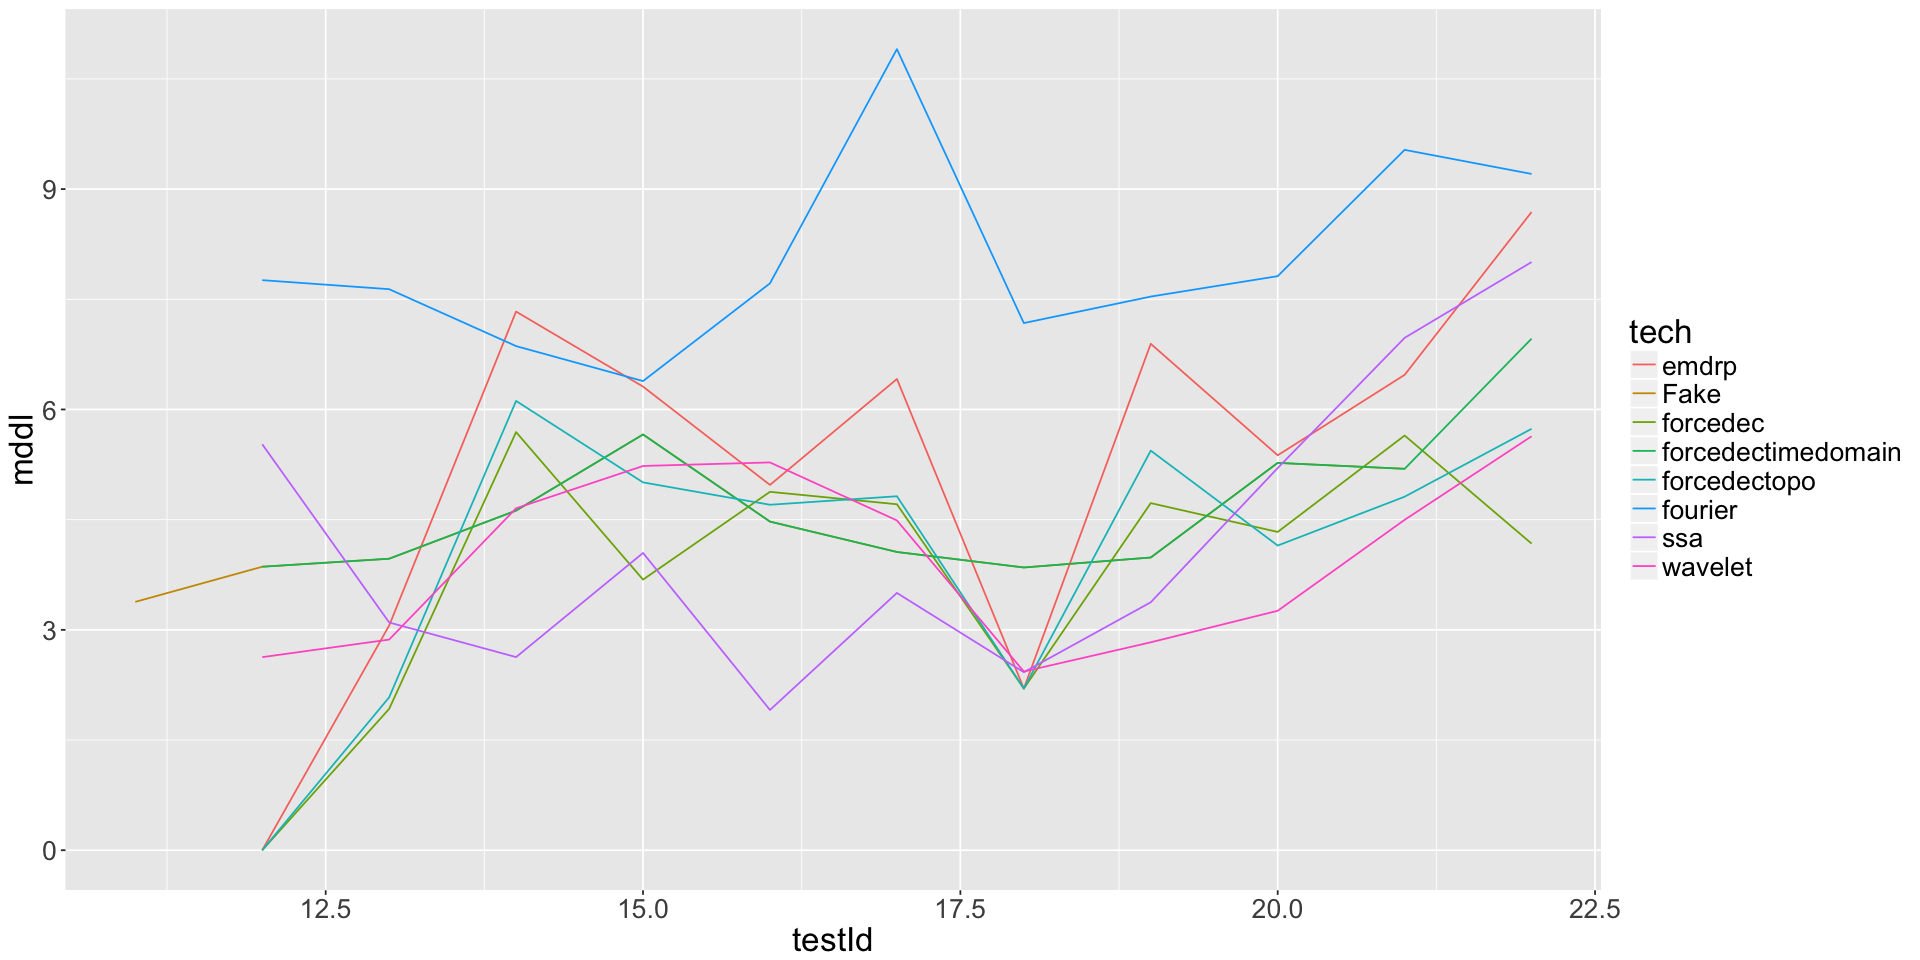

In [212]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"lorenz_result_mddl.pdf", sep='/'), width=16, height=5)

pdf 
  2

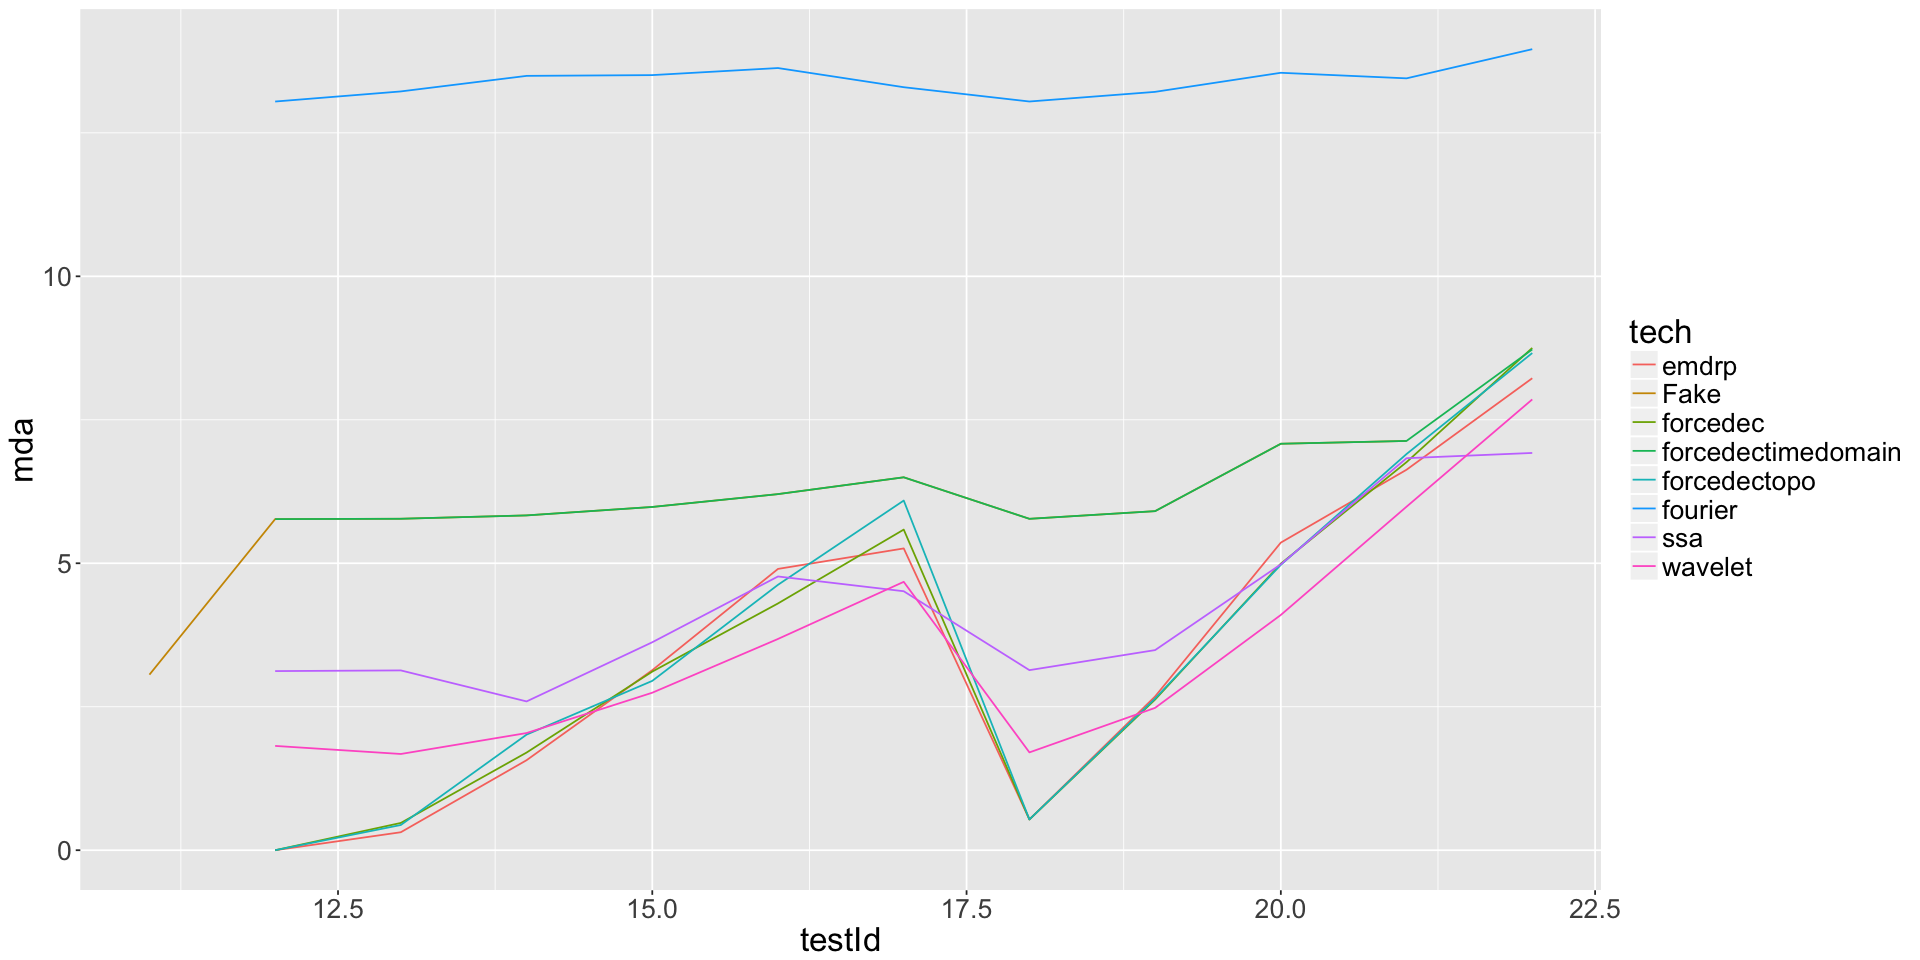

In [213]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"lorenz_result_mda.pdf", sep='/'), width=16, height=5)

pdf 
  2

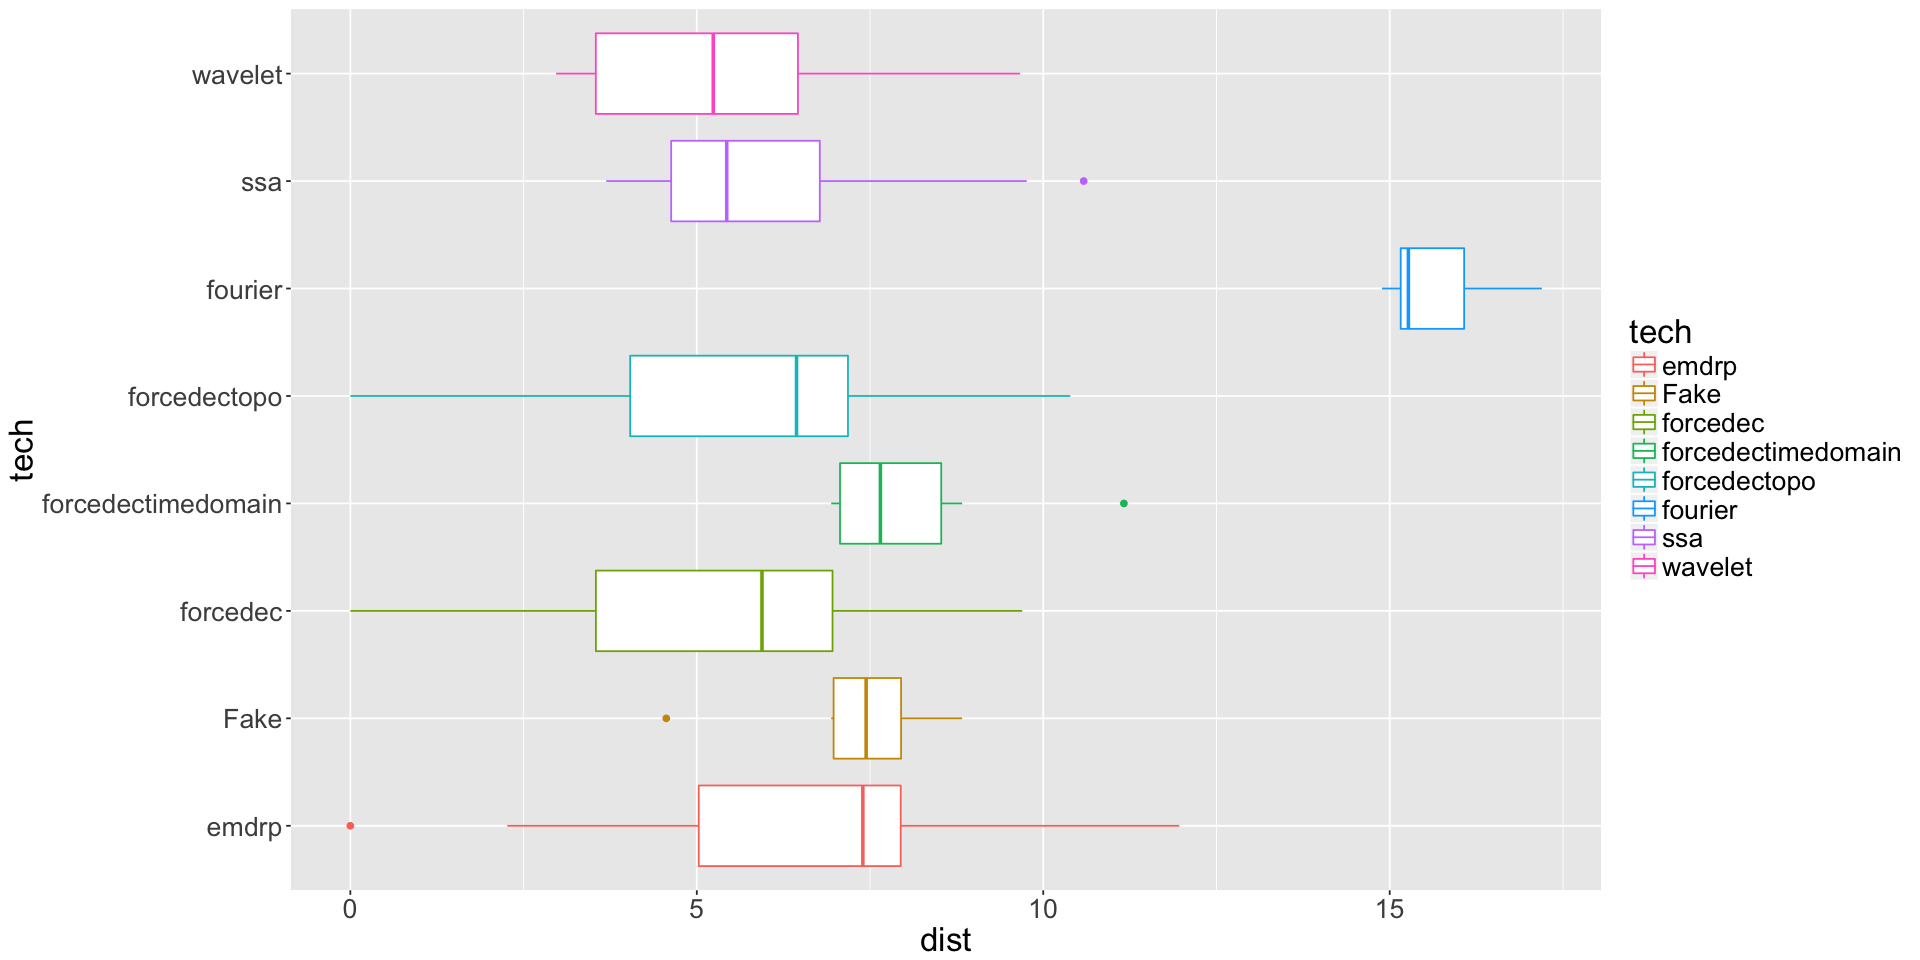

In [214]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx, c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"lorenz_result_dist_boxplot.pdf", sep='/'), width=16, height=5)

---
Dataset Rossler
===

In [215]:
scenario.idx = 23:33

pdf 
  2

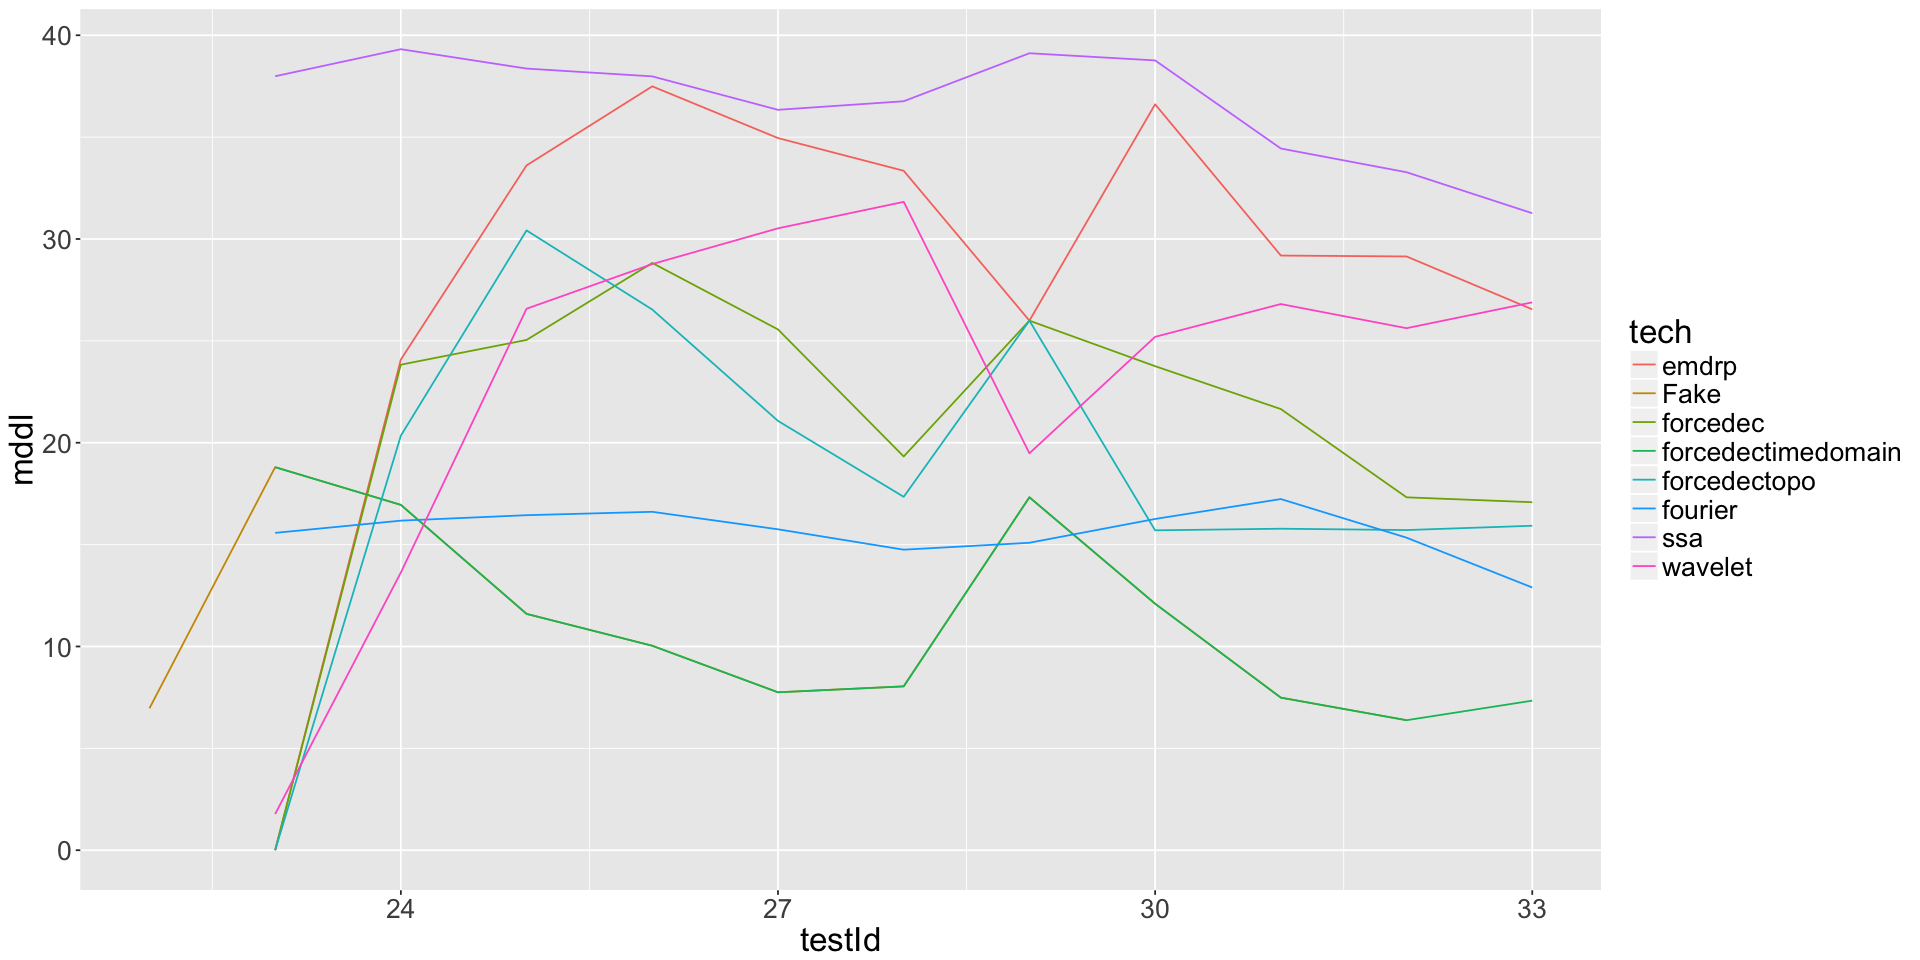

In [216]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"rossler_result_mddl.pdf", sep='/'), width=16, height=5)

pdf 
  2

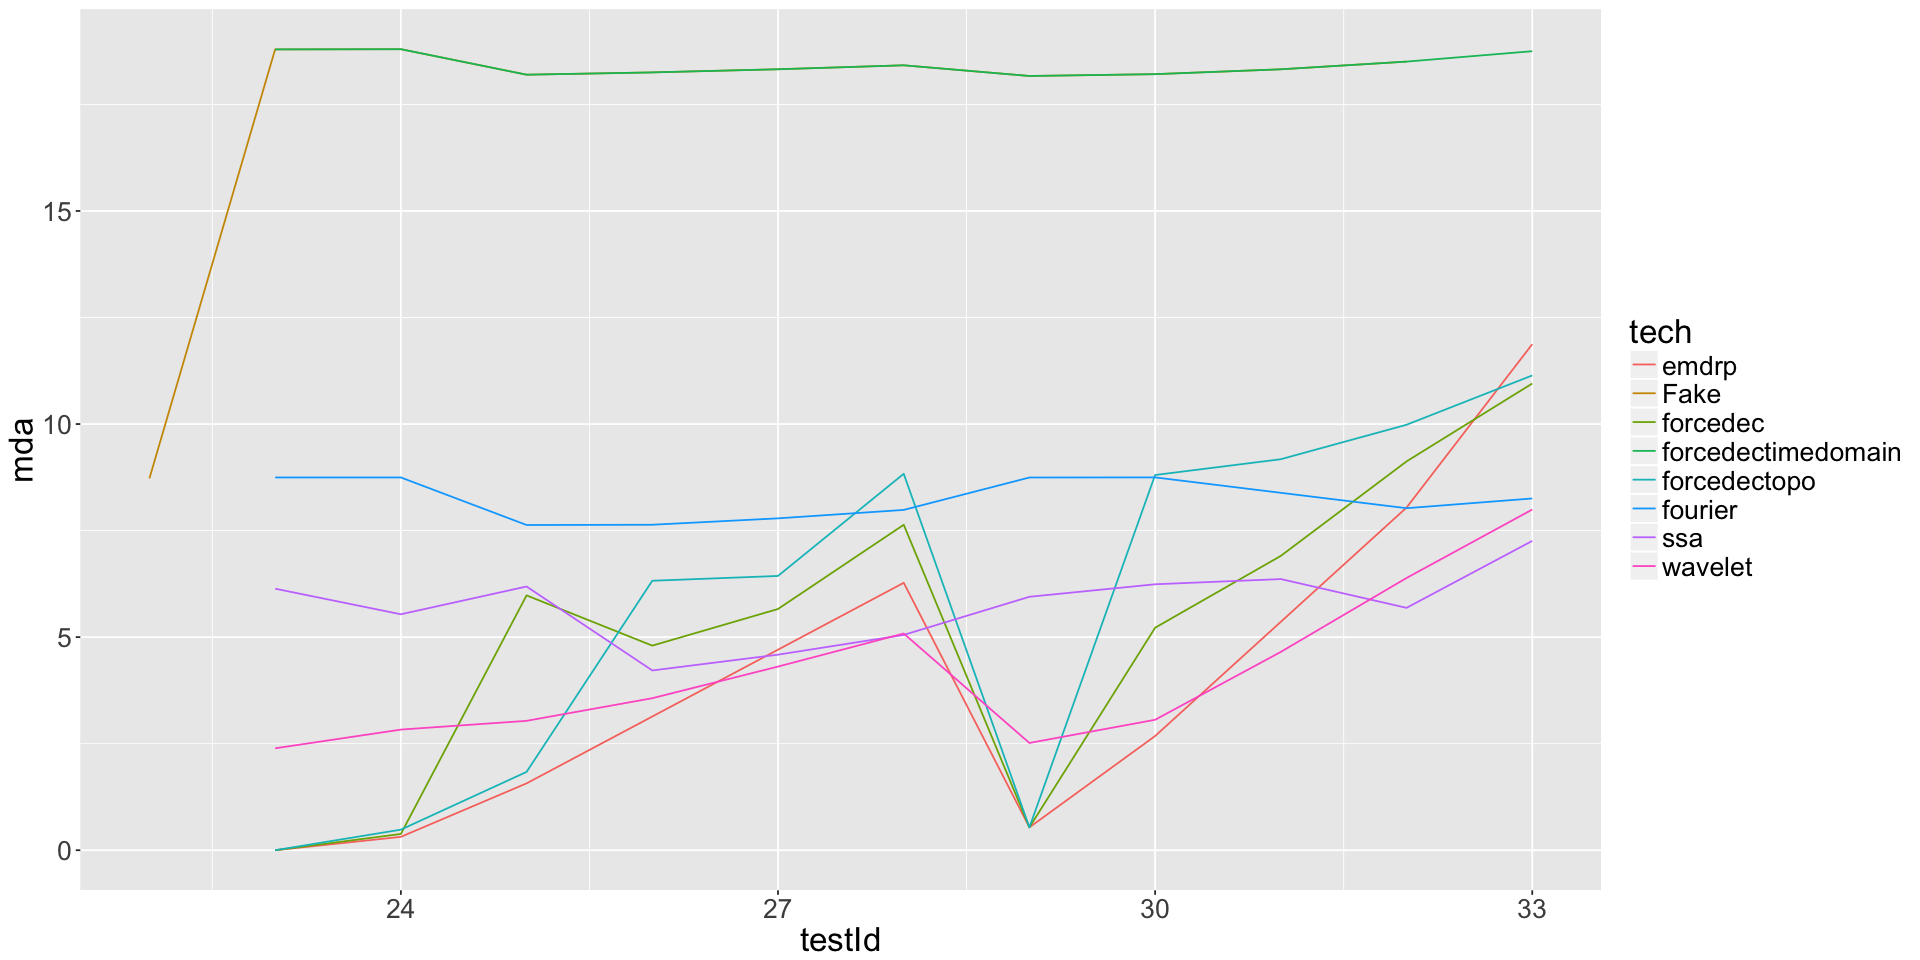

In [217]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"rossler_result_mda.pdf", sep='/'), width=16, height=5)

pdf 
  2

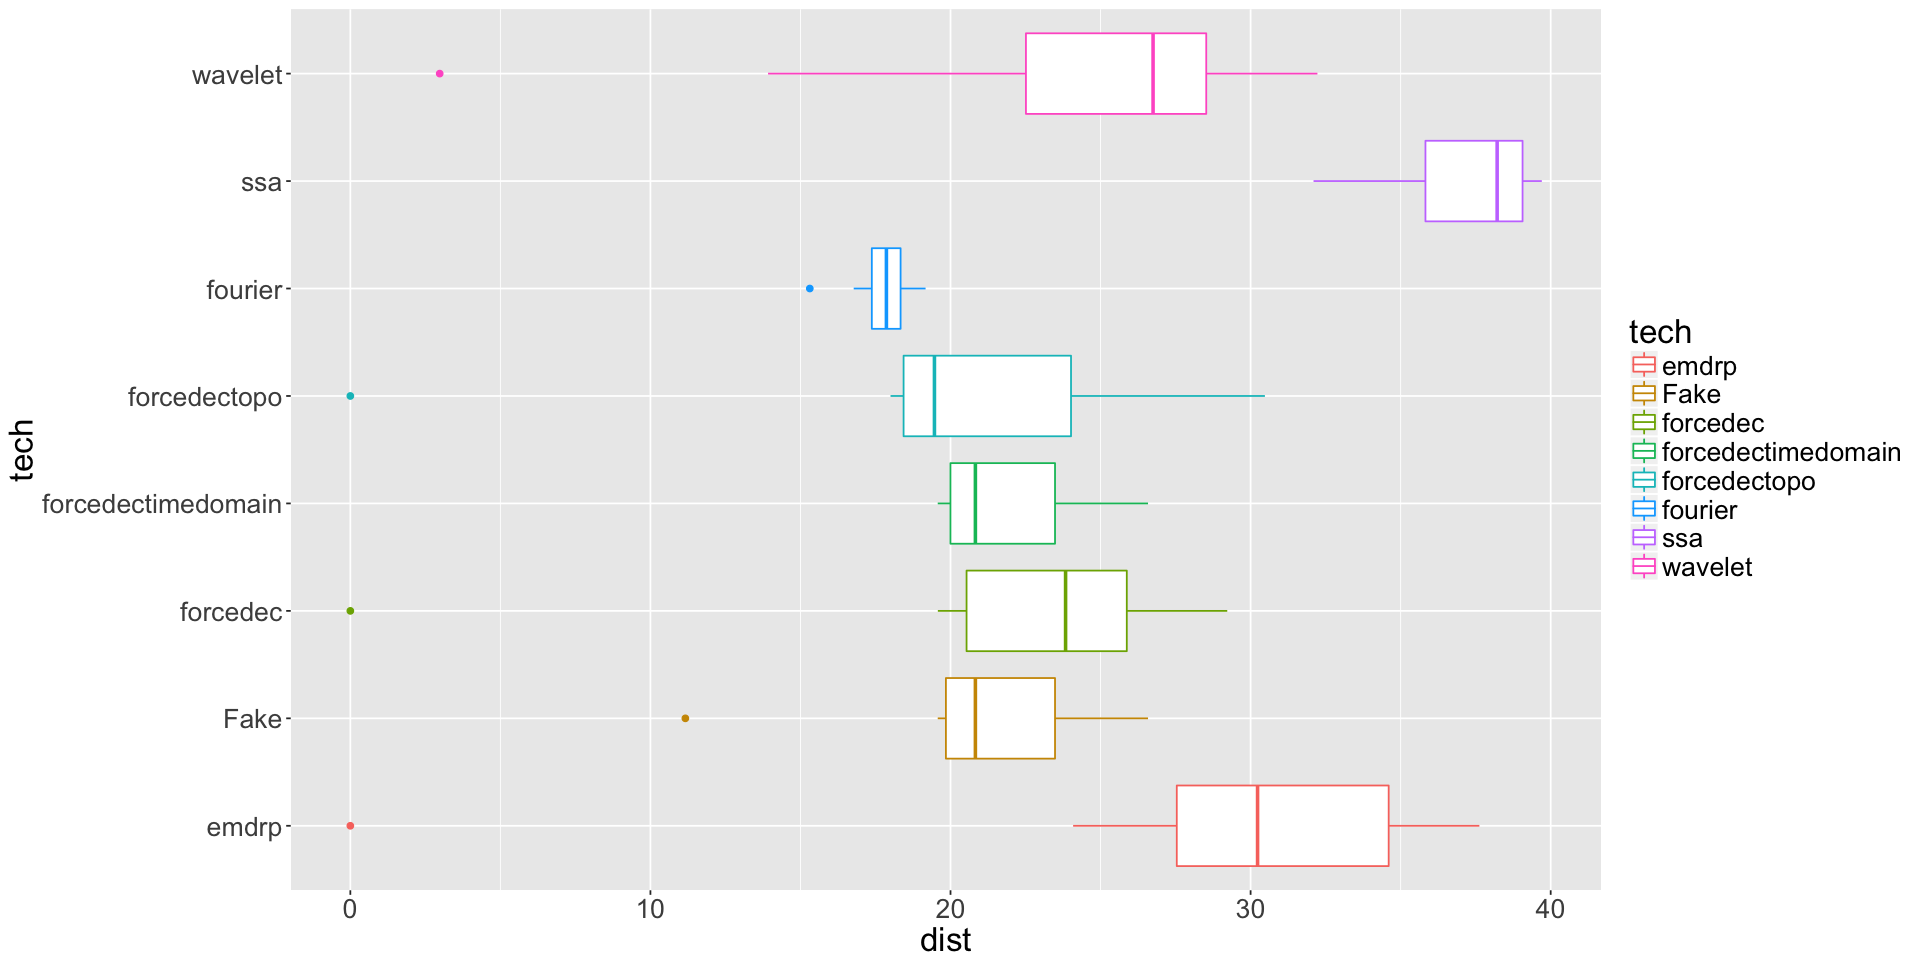

In [218]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx, c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"rossler_result_dist_boxplot.pdf", sep='/'), width=16, height=5)

---
Dataset Logistic
===

In [219]:
scenario.idx = 34:44

pdf 
  2

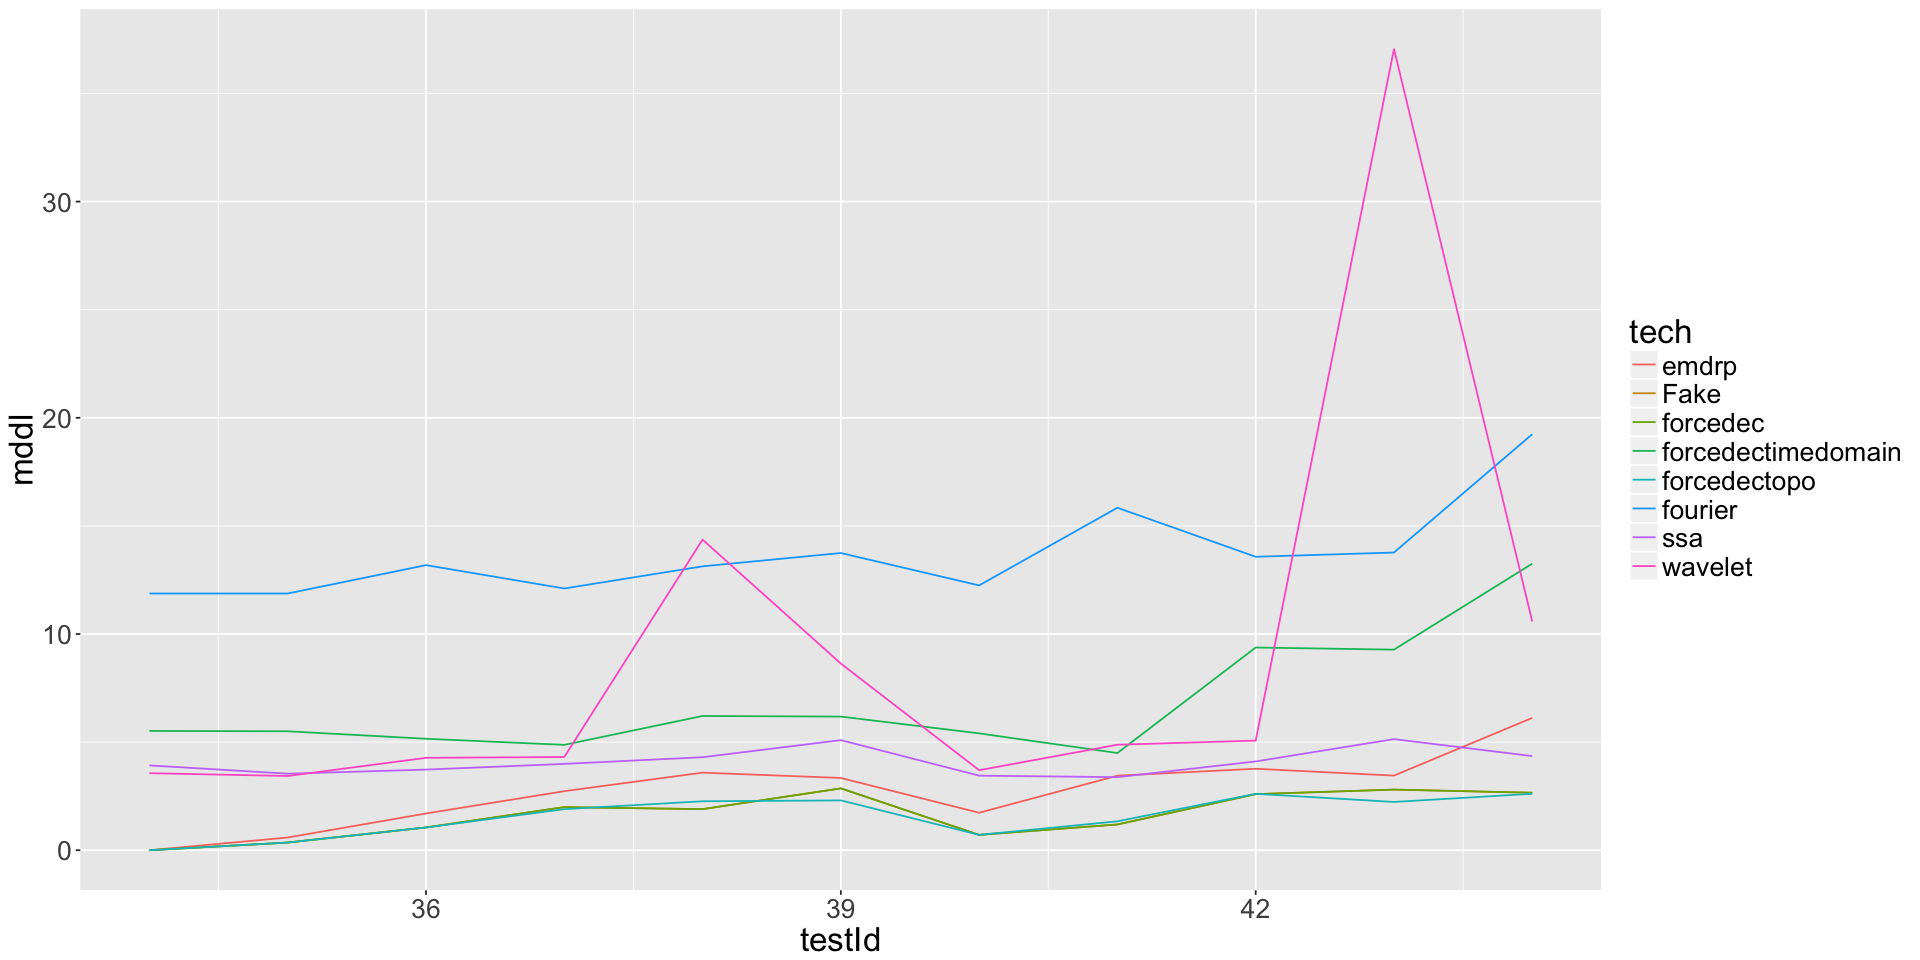

In [220]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"logistic_result_mddl.pdf", sep='/'), width=16, height=5)

pdf 
  2

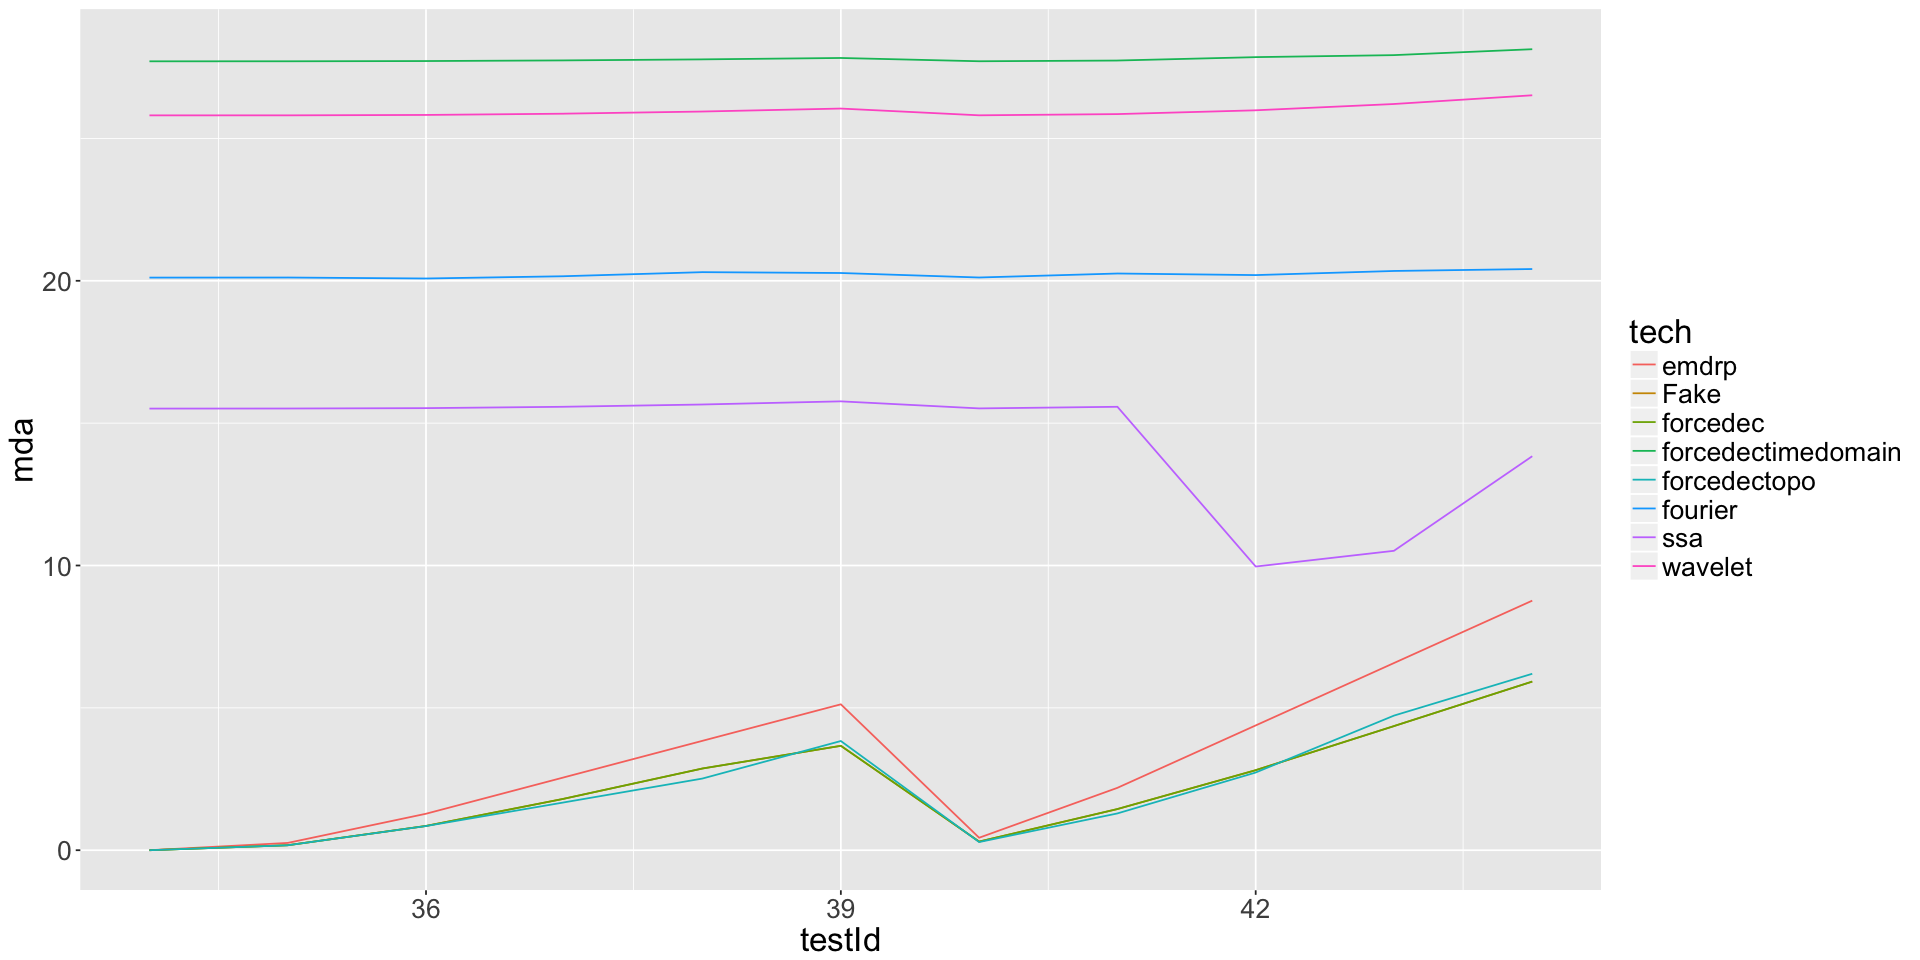

In [221]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"logistic_result_mda.pdf", sep='/'), width=16, height=5)

pdf 
  2

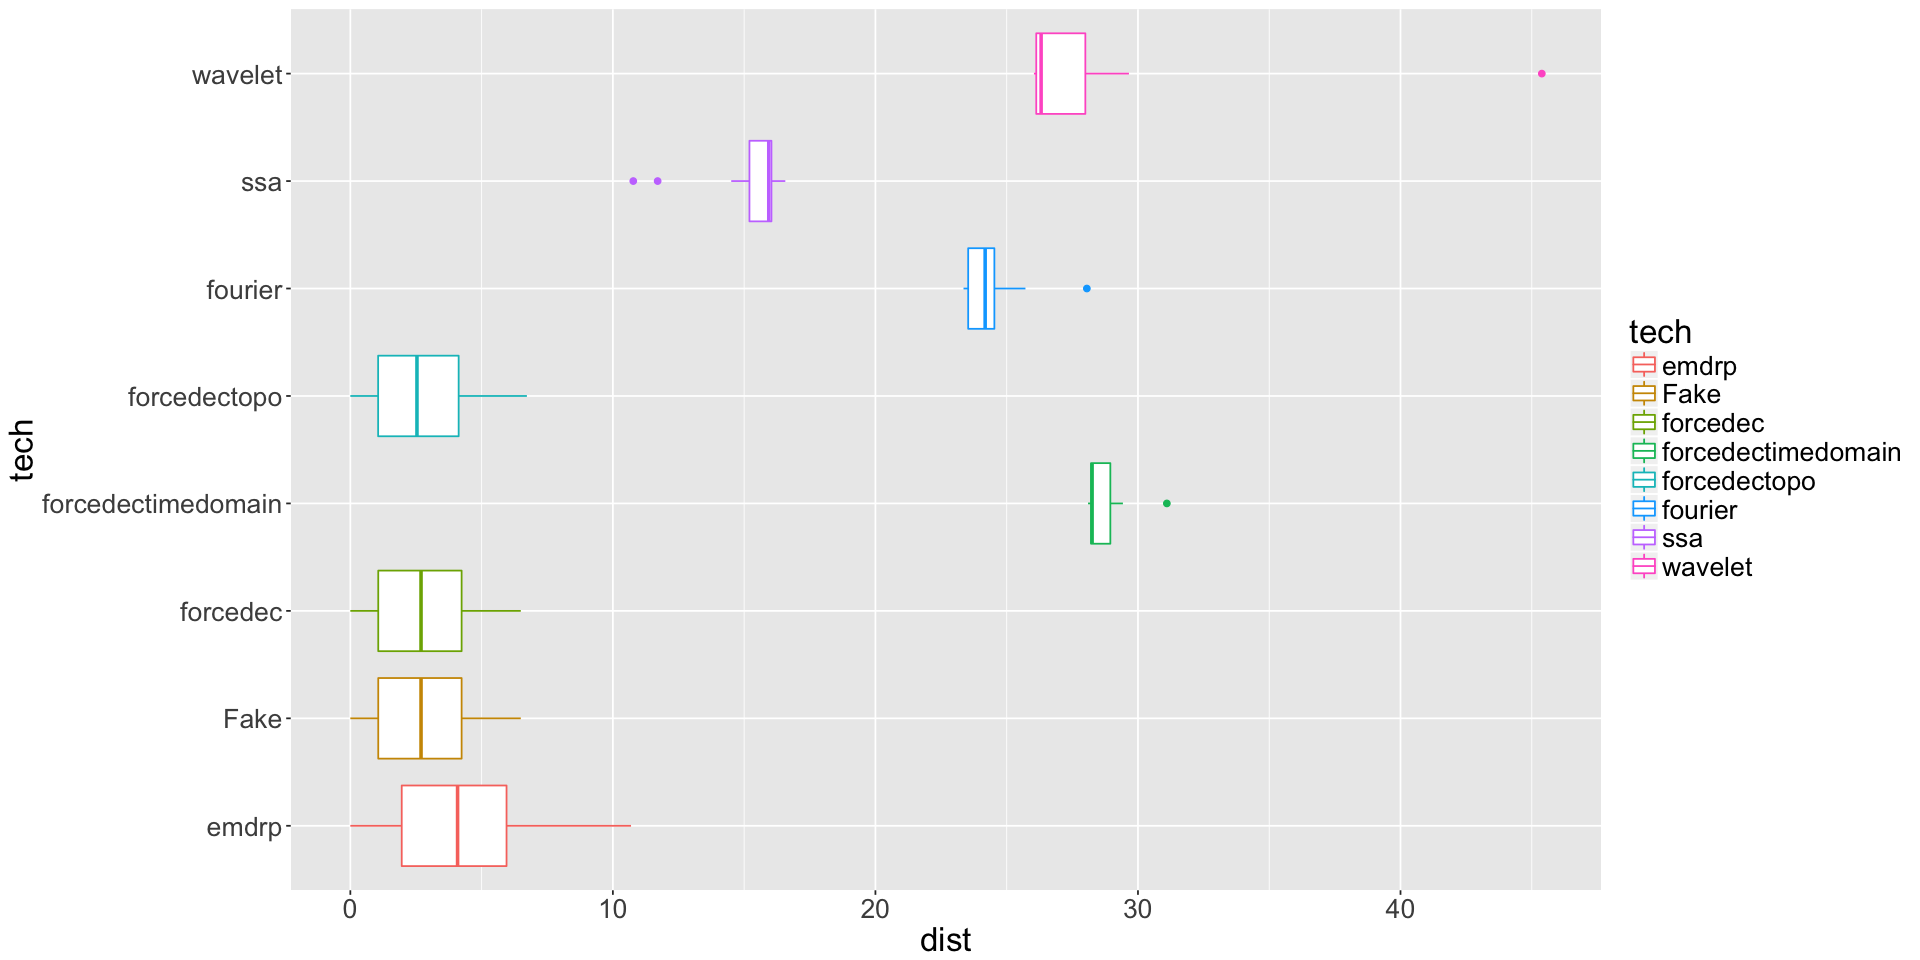

In [222]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx, c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"logistic_result_dist_boxplot.pdf", sep='/'), width=16, height=5)

---
Dataset Henon
===

In [223]:
scenario.idx = 45:55

pdf 
  2

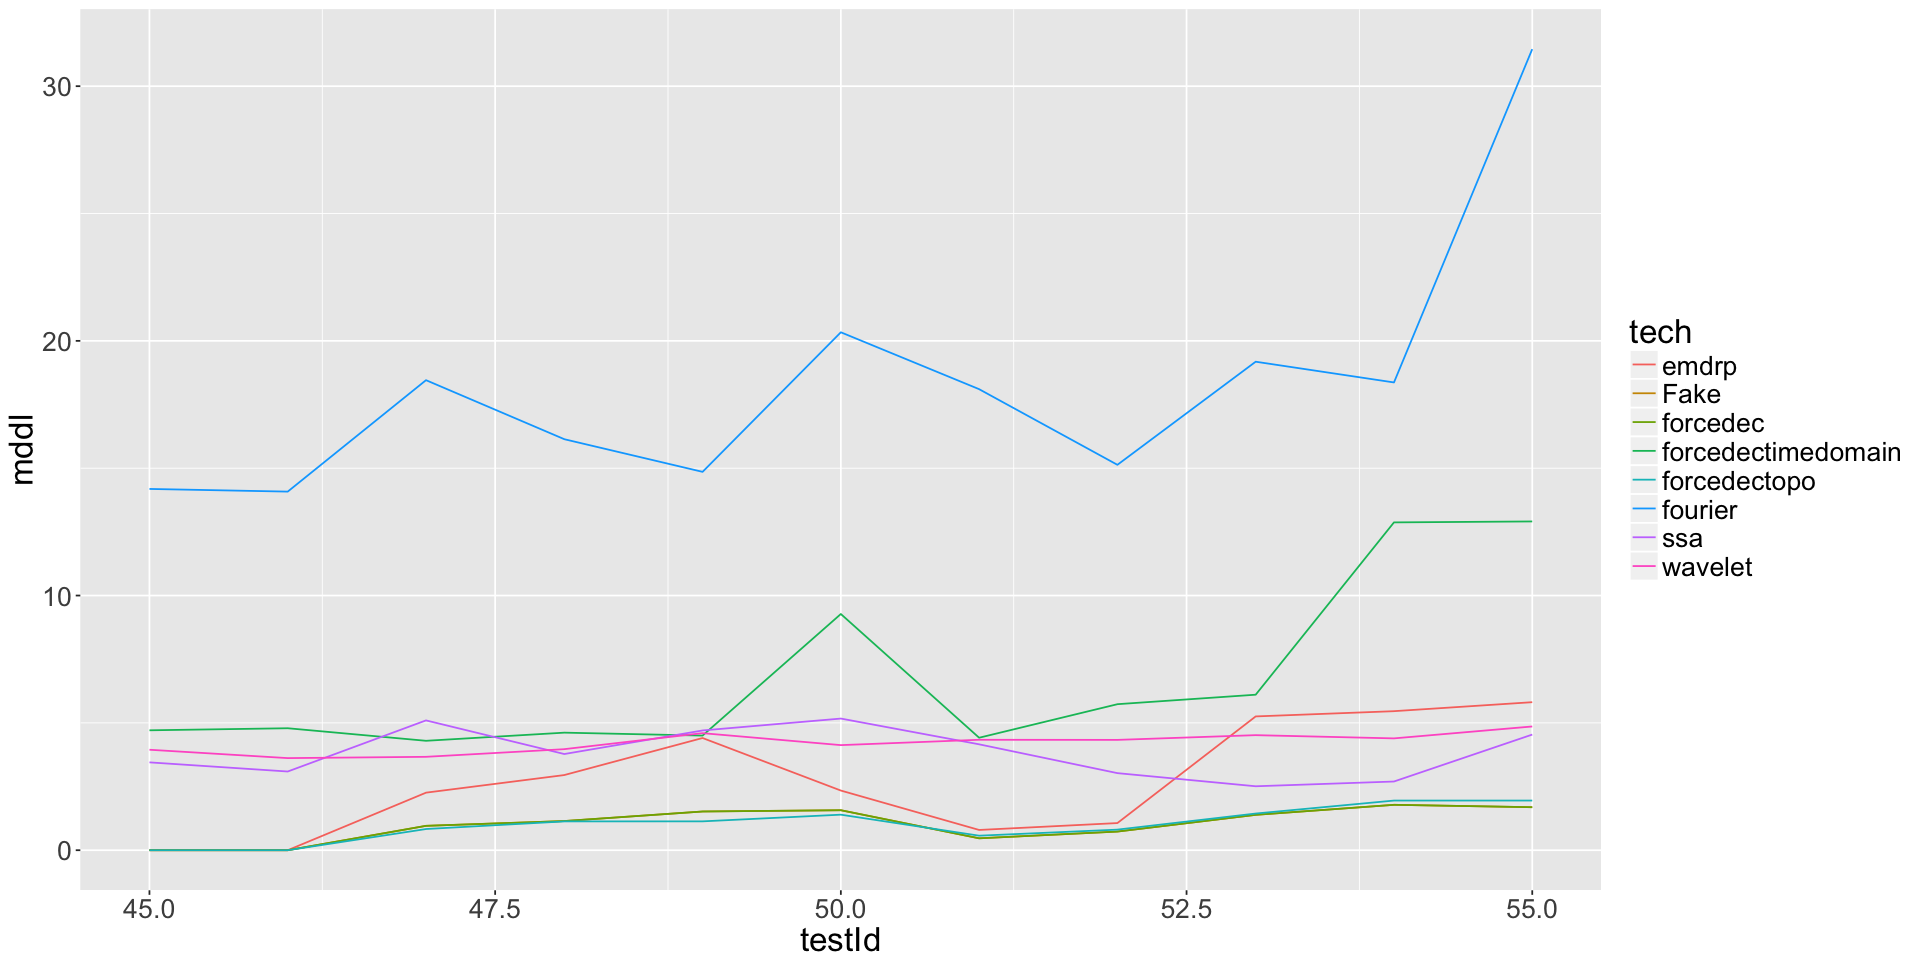

In [224]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"henon_result_mddl.pdf", sep='/'), width=16, height=5)

pdf 
  2

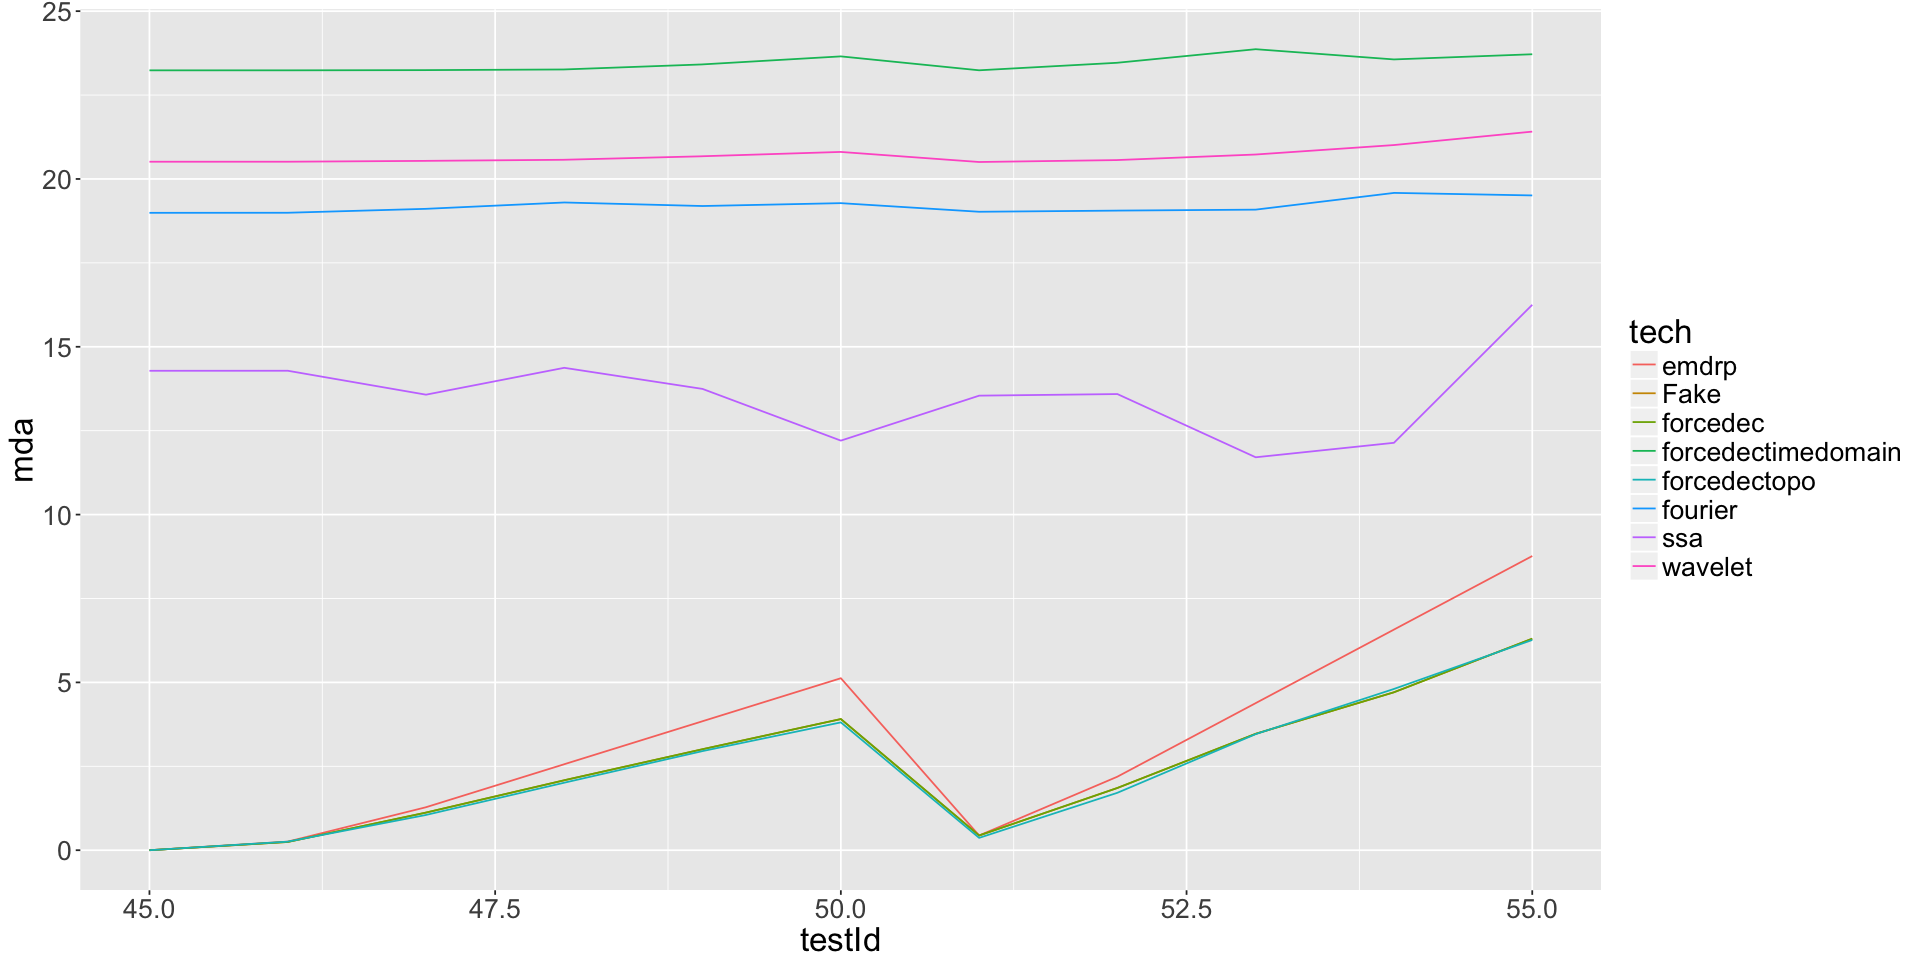

In [225]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"henon_lorenz_result_mda.pdf", sep='/'), width=16, height=5)

pdf 
  2

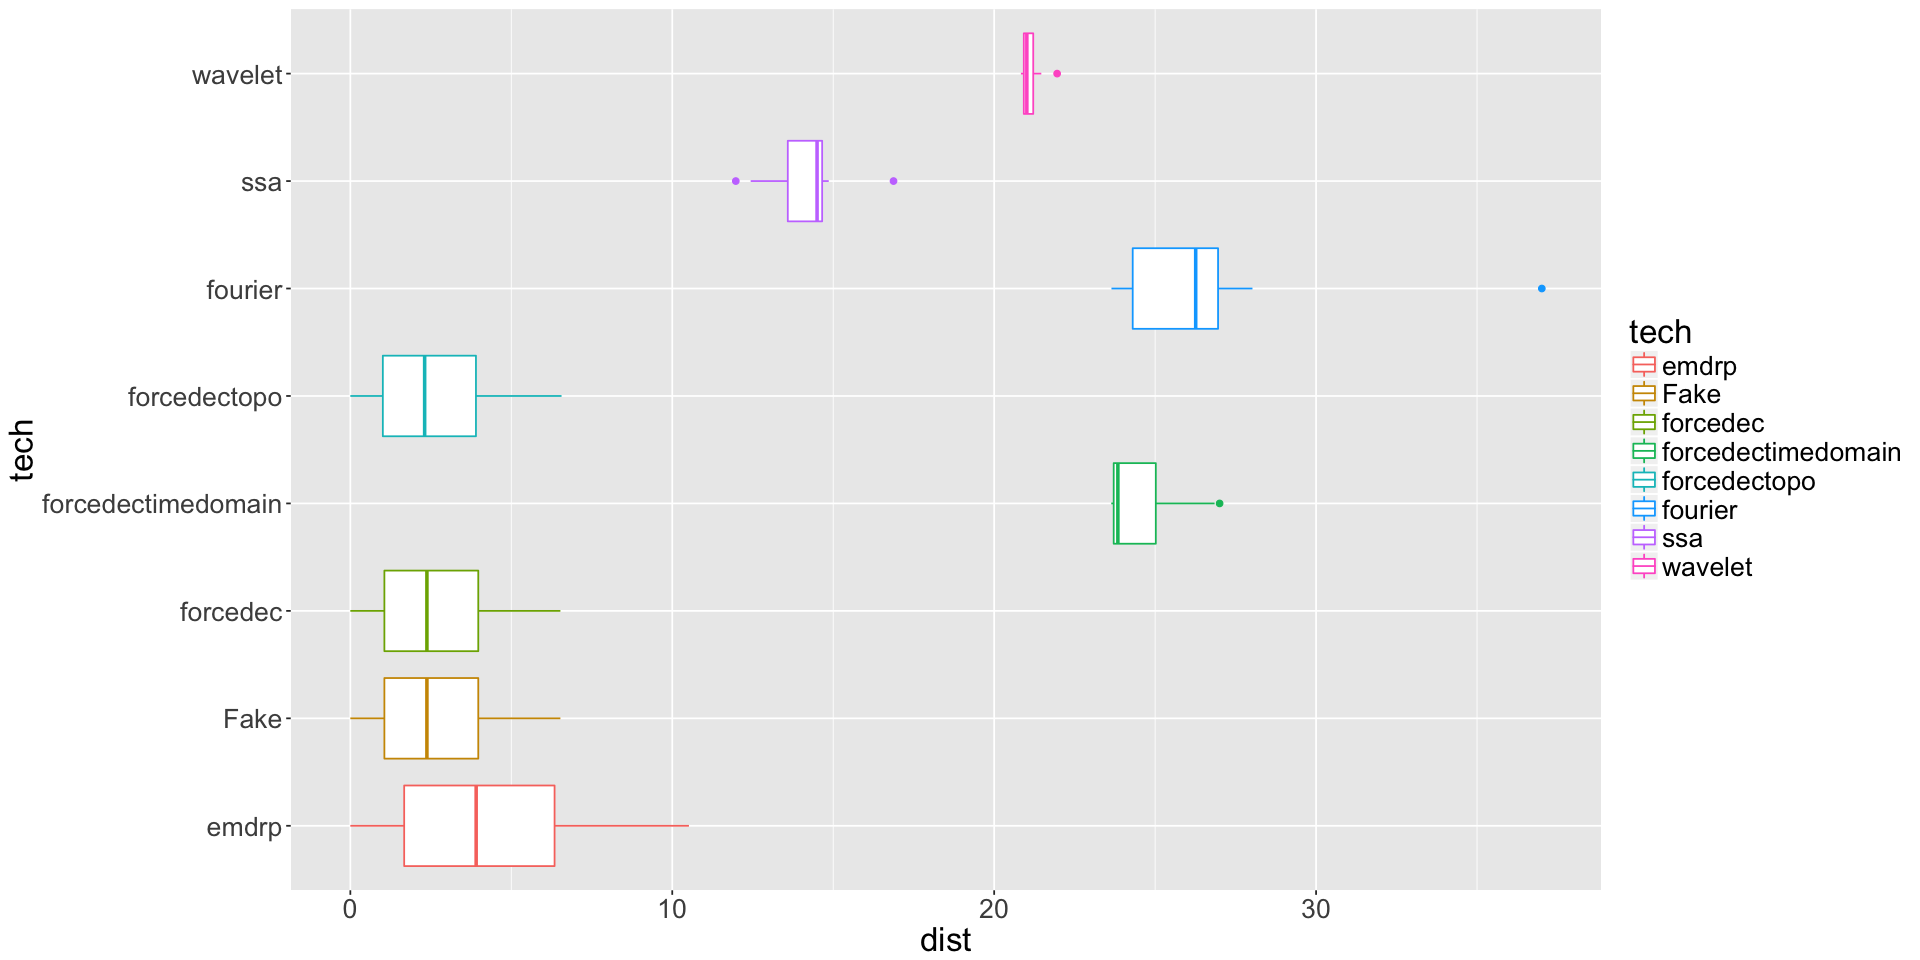

In [226]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx, c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"henon_result_dist_boxplot.pdf", sep='/'), width=16, height=5)